
# Diabetes Health Indicators Dataset

The purpose of this code notebook is to clean and prepare the BRFSS data into a useable format to predict the accuracy if a person might have diabetes or is at risk of diabetes by finding out what risk factors are the most predictive of diabetic risk.

The dataset is from kaggle. This project will be using only the diabetes_binary_5050split_health_indicators_BRFSS2015.csv. This is a clean dataset of 70692 survey responses to CDC's BRFSS2015. It has a 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classs. 0 is for no diabetes and 1 is for prediabetes or diabetes. It has 22 feature variables and is balanced.

Based on the diabetes disease research regarding factors influencing diabetes disease and other chronic health conditions, only select features are included in this analysis.

Research in the field has identified the following as important risk factors for diabetes and other chronic illnesses like heart disease. The following are the selected subset of features from BRFSS 2015.

- diabetes binary (0 = no diabetes; 1 = prediabetes/diabetes)
- high blood pressure (0 = no high BP; 1 = high BP)
- high cholesterol (0 = no high cholesterol; 1 = high cholesterol)
- cholesterol check (0 = no choesterol check in 5 years; 1 = yes cholesterol check in 5 years)
- BMI (body mass index)
- smoker (smoke at least 100 cigarettes in entire life; 5 packs = 100 cigarettes; 0 = no; 1 = yes)
- stroke (ever told had a stroke; 0 = no; 1 = yes)
- heart disease or attack (coronary heart disease(CHD) or myocardial infarction(MI); 0 = no; 1 = yes)
- physical activity (in past 30 days not including job; 0 = no; 1 = yes))
- fruits (consumed 1 or more times per day; 0 = no; 1 = yes)
- veggies (consumed 1 or more times per day; 0 = no; 1 = yes)
- heavy alcohol consumption (adult men =>14 drinks per week; adult women =>7 drinks per week; 0 = no; 1 = yes)
- any healthcare (any kind of healthcare coverage including health insurance, prepaid plans (HMO etc); 0 = no; 1 = yes)
- no doctor because of cost (past 12 months when needed to see doctor but could not because of cost; 0 = no; 1 = yes)
- general health (general health 5 scale; 1 = excellent; 2 = very good; 3 = good; 4 = fair; 5 = poor)
- mental health (days of poor mental health 1-30 days)
- physical health (physical illness or injury days in past 30 days scale of 1-30)
- difficulty walking (have serious difficulty walking or climbing stairs; 0 = no; 1 = yes)
- sex (0 = female; 1 = male)
- age (14 level age category; 1 = 18-24; 2 = 25-29; 3 = 30-34; 4 = 35-39; 5 = 40-44; 6 = 45-49; 7 = 50-54; 8 = 55-59; 9 = 60-64; 10 = 65-69; 11 = 70-74; 12 = 75-79; 13 = 80 or>; 14 = not know/not sure/refused/missing)
- education (scale 1-6, 9); 1 = never attended school or only kindergarten; 2 = elementary; 3 = some high school; 4 = high school graduate; 5 = some college; 6 = college graduate or more; 9 = refused)
- income (scale 1-8; 1 = <10K; 2 = <15K; 3 = <20K; 4 = <25K; 5 = <35K; 6 = <50K; 7 = <75K; 8 = >75K or more; 77 = not know/not sure; 99 = refused)
  
The selected subset of features (columns from the dataset) from BRFSS 2015 was further investigated for additional information in order to understand the meaning of the data gathered from the BRFSS 2015 codebook from the survey.

Additional information about the BRFSS 2015 codebook and relevant paper are as follows:

BRFSS 2015 Codebook: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

Relevant Research Paper using BRFSS for Diabetes ML: https://www.cdc.gov/pcd/issues/2019/19_0109.html

## PART ONE

## Data Wrangling

### Data Collection:
__Goal:__ Organize the data to streamline the next steps of the capstone project.<br>
__Performed:__ Data loading

### Data Organization:
__Goal:__ Create the file structure and add the work project to the GitHub repository created for this project.<br>
__Performed:__ A file structure was created in GitHub for repository for this capstone project and glob library also downloaded for the project.

### Data Definition:
__Goal:__ Gain an understanding of the data features to inform the next steps of the project.<br>
__Performed:__ Check the column names, data types, described the columns, counts, percents of unique values, ranges of the values.
    
### Data Cleaning:
__Goal:__ Clean up the data in order to prepare it for the next steps of the project.<br>
__Performed:__ Checking for missing values, NaN values, duplicates, using appply(), nunique(), .isnull().values.any()
    

In [2]:
# Imports
import os
import pandas as pd
import numpy as np
import glob
import random
random.seed(1)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.proportion import proportions_ztest
import ydata_profiling
#!pip install termcolor
#from termcolor import colored
#!pip install colorama
from colorama import Fore, Back, Style
import statsmodels.stats.weightstats as ws

This is the best place to put all the libraries needed for the project.

In [2]:
#read in the dataset (select 2015)
brfss2015_dataset = pd.read_csv('BRFSSdata/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

The dataset is imported from the source: kaggle using the pd.read_csv.

In [3]:
#check the head of the transposed dataframe
brfss2015_dataset.head().T

0     1     2     3     4
Diabetes_binary        0.0   0.0   0.0   0.0   0.0
HighBP                 1.0   1.0   0.0   1.0   0.0
HighChol               0.0   1.0   0.0   1.0   0.0
CholCheck              1.0   1.0   1.0   1.0   1.0
BMI                   26.0  26.0  26.0  28.0  29.0
Smoker                 0.0   1.0   0.0   1.0   1.0
Stroke                 0.0   1.0   0.0   0.0   0.0
HeartDiseaseorAttack   0.0   0.0   0.0   0.0   0.0
PhysActivity           1.0   0.0   1.0   1.0   1.0
Fruits                 0.0   1.0   1.0   1.0   1.0
Veggies                1.0   0.0   1.0   1.0   1.0
HvyAlcoholConsump      0.0   0.0   0.0   0.0   0.0
AnyHealthcare          1.0   1.0   1.0   1.0   1.0
NoDocbcCost            0.0   0.0   0.0   0.0   0.0
GenHlth                3.0   3.0   1.0   3.0   2.0
MentHlth               5.0   0.0   0.0   0.0   0.0
PhysHlth              30.0   0.0  10.0   3.0   0.0
DiffWalk               0.0   0.0   0.0   0.0   0.0
Sex                    1.0   1.0   1.0   1.0   0.0
Age                    4.0  12.0  13.0  11.0   8.0
Education              6.0   6.0   6.0   6.0   5.0
Income                 8.0   8.0   8.0   8.0   8.0

Check to see the top 5 of the dataset.

In [4]:
#call the  info method on brfss2015_dataset to see a summary of the data and the datatypes present
brfss2015_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

These are floats and could be integers since the data are already categorized;
This gives a summary of the info in the dataset.

In [5]:
#find out the shape of the data to determine the number of rows and columns
brfss2015_dataset.shape

(70692, 22)

This gives a better picture of the number of rows and columns of the dataset.

In [6]:
# print out the columns of the datatset
brfss2015_dataset.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

This concisely showed the names of the columns in the dataset and easy indexing if needed.

In [7]:
#we can also find what datatypes the data has by calling .dtypes
brfss2015_dataset.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

Confirmed the datatypes present in the dataset.

In [8]:
#calling the describe method gives you a descriptive statistics summary of the data; 
#easier to view since less columns for the stats data therby called in transpose method
brfss2015_dataset.describe().T

count       mean        std   min   25%   50%   75%  \
Diabetes_binary       70692.0   0.500000   0.500004   0.0   0.0   0.5   1.0   
HighBP                70692.0   0.563458   0.495960   0.0   0.0   1.0   1.0   
HighChol              70692.0   0.525703   0.499342   0.0   0.0   1.0   1.0   
CholCheck             70692.0   0.975259   0.155336   0.0   1.0   1.0   1.0   
BMI                   70692.0  29.856985   7.113954  12.0  25.0  29.0  33.0   
Smoker                70692.0   0.475273   0.499392   0.0   0.0   0.0   1.0   
Stroke                70692.0   0.062171   0.241468   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  70692.0   0.147810   0.354914   0.0   0.0   0.0   0.0   
PhysActivity          70692.0   0.703036   0.456924   0.0   0.0   1.0   1.0   
Fruits                70692.0   0.611795   0.487345   0.0   0.0   1.0   1.0   
Veggies               70692.0   0.788774   0.408181   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     70692.0   0.042721   0.202228   0.0   0.0   0.0   0.0   
AnyHealthcare         70692.0   0.954960   0.207394   0.0   1.0   1.0   1.0   
NoDocbcCost           70692.0   0.093914   0.291712   0.0   0.0   0.0   0.0   
GenHlth               70692.0   2.837082   1.113565   1.0   2.0   3.0   4.0   
MentHlth              70692.0   3.752037   8.155627   0.0   0.0   0.0   2.0   
PhysHlth              70692.0   5.810417  10.062261   0.0   0.0   0.0   6.0   
DiffWalk              70692.0   0.252730   0.434581   0.0   0.0   0.0   1.0   
Sex                   70692.0   0.456997   0.498151   0.0   0.0   0.0   1.0   
Age                   70692.0   8.584055   2.852153   1.0   7.0   9.0  11.0   
Education             70692.0   4.920953   1.029081   1.0   4.0   5.0   6.0   
Income                70692.0   5.698311   2.175196   1.0   4.0   6.0   8.0   

                       max  
Diabetes_binary        1.0  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
HeartDiseaseorAttack   1.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                 8.0

These gives a descriptive statistical summary of the dataset.

In [9]:
brfss2015_dataset.isnull().values.any()

False

Shows there are no missing values in the dataset.

In [10]:
#find out the number of missing values using .isnull() in each of the column
#find out the percentages using mean 
#present a table with column names of count and percentages
missing =pd.concat([brfss2015_dataset.isnull().sum(), 100* brfss2015_dataset.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by=['count', '%'])

count    %
Diabetes_binary           0  0.0
HighBP                    0  0.0
HighChol                  0  0.0
CholCheck                 0  0.0
BMI                       0  0.0
Smoker                    0  0.0
Stroke                    0  0.0
HeartDiseaseorAttack      0  0.0
PhysActivity              0  0.0
Fruits                    0  0.0
Veggies                   0  0.0
HvyAlcoholConsump         0  0.0
AnyHealthcare             0  0.0
NoDocbcCost               0  0.0
GenHlth                   0  0.0
MentHlth                  0  0.0
PhysHlth                  0  0.0
DiffWalk                  0  0.0
Sex                       0  0.0
Age                       0  0.0
Education                 0  0.0
Income                    0  0.0

This is another way to confirm that there are no missing data in any of the columns.

In [11]:
#call in .nunique() method to return the number of uniques values for each column of the dataset
brfss2015_dataset.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

Shows the number of unique values in each column.

In [12]:
brfss2015_dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
70687    False
70688    False
70689    False
70690    False
70691    False
Length: 70692, dtype: bool

No duplicates found in the dataset.

In [13]:
#use replace NaN with empty string using replace()function [df.replace(np.nan, '' or '-')]
data = brfss2015_dataset.apply(pd.value_counts).T
data.replace(np.nan, '-')

0.0      1.0      2.0      3.0      4.0      5.0   \
Diabetes_binary       35346.0  35346.0        -        -        -        -   
HighBP                30860.0  39832.0        -        -        -        -   
HighChol              33529.0  37163.0        -        -        -        -   
CholCheck              1749.0  68943.0        -        -        -        -   
BMI                         -        -        -        -        -        -   
Smoker                37094.0  33598.0        -        -        -        -   
Stroke                66297.0   4395.0        -        -        -        -   
HeartDiseaseorAttack  60243.0  10449.0        -        -        -        -   
PhysActivity          20993.0  49699.0        -        -        -        -   
Fruits                27443.0  43249.0        -        -        -        -   
Veggies               14932.0  55760.0        -        -        -        -   
HvyAlcoholConsump     67672.0   3020.0        -        -        -        -   
AnyHealthcare          3184.0  67508.0        -        -        -        -   
NoDocbcCost           64053.0   6639.0        -        -        -        -   
GenHlth                     -   8282.0  19872.0  23427.0  13303.0   5808.0   
MentHlth              48091.0   2051.0   3267.0   1967.0    981.0   2519.0   
PhysHlth              39915.0   2853.0   4102.0   2438.0   1376.0   2332.0   
DiffWalk              52826.0  17866.0        -        -        -        -   
Sex                   38386.0  32306.0        -        -        -        -   
Age                         -    979.0   1396.0   2049.0   2793.0   3520.0   
Education                   -     75.0   1647.0   3447.0  19473.0  20030.0   
Income                      -   3611.0   4498.0   5557.0   6658.0   8010.0   

                         6.0      7.0      8.0      9.0   ...  82.0 83.0  \
Diabetes_binary             -        -        -        -  ...     -    -   
HighBP                      -        -        -        -  ...     -    -   
HighChol                    -        -        -        -  ...     -    -   
CholCheck                   -        -        -        -  ...     -    -   
BMI                         -        -        -        -  ...  11.0  1.0   
Smoker                      -        -        -        -  ...     -    -   
Stroke                      -        -        -        -  ...     -    -   
HeartDiseaseorAttack        -        -        -        -  ...     -    -   
PhysActivity                -        -        -        -  ...     -    -   
Fruits                      -        -        -        -  ...     -    -   
Veggies                     -        -        -        -  ...     -    -   
HvyAlcoholConsump           -        -        -        -  ...     -    -   
AnyHealthcare               -        -        -        -  ...     -    -   
NoDocbcCost                 -        -        -        -  ...     -    -   
GenHlth                     -        -        -        -  ...     -    -   
MentHlth                288.0    825.0    198.0     28.0  ...     -    -   
PhysHlth                447.0   1326.0    276.0     55.0  ...     -    -   
DiffWalk                    -        -        -        -  ...     -    -   
Sex                         -        -        -        -  ...     -    -   
Age                    4648.0   6872.0   8603.0  10112.0  ...     -    -   
Education             26020.0        -        -        -  ...     -    -   
Income                10287.0  11425.0  20646.0        -  ...     -    -   

                      84.0 85.0 86.0  87.0 89.0 92.0 95.0 98.0  
Diabetes_binary          -    -    -     -    -    -    -    -  
HighBP                   -    -    -     -    -    -    -    -  
HighChol                 -    -    -     -    -    -    -    -  
CholCheck                -    -    -     -    -    -    -    -  
BMI                   13.0  1.0  1.0  13.0  4.0  9.0  4.0  4.0  
Smoker                   -    -    -     -    -    -    -    -  
Stroke                   -

NaN values or '-' are not applicable, most of the values are 0 and 1 representing yes/no values.

In [14]:
#total number of male=1; female=0; diabetes=2
percent = pd.concat([brfss2015_dataset.value_counts(subset='Diabetes_binary'), 
           brfss2015_dataset.value_counts(subset='Diabetes_binary')/
           brfss2015_dataset.value_counts(subset='Diabetes_binary').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

count     %
Diabetes_binary             
0.0              35346  50.0
1.0              35346  50.0

Shows that there is a 50-50 split of people without and with diabetes in the survey.

In [15]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='HighBP'), 
           brfss2015_dataset.value_counts(subset='HighBP')/
           brfss2015_dataset.value_counts(subset='HighBP').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

count          %
HighBP                  
0.0     30860  43.654162
1.0     39832  56.345838

There are 56.35% of people with high BP and 43.65% of people who do not have high BP.

In [16]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='HighChol'), 
           brfss2015_dataset.value_counts(subset='HighChol')/
           brfss2015_dataset.value_counts(subset='HighChol').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

count          %
HighChol                  
0.0       33529  47.429695
1.0       37163  52.570305

There are 52.57% of people with high cholesterol and 47.43% of people who do not have high cholesterol.

In [17]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='CholCheck'), 
           brfss2015_dataset.value_counts(subset='CholCheck')/
           brfss2015_dataset.value_counts(subset='CholCheck').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

count          %
CholCheck                  
0.0         1749   2.474113
1.0        68943  97.525887

There are 97.53% of people who had their cholesterol check in the past 5 years and 2.47% of people who did not have their cholesterol check in the last 5 years.

In [18]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='BMI'), 
           brfss2015_dataset.value_counts(subset='BMI')/
           brfss2015_dataset.value_counts(subset='BMI').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'], ascending=False).head(10)

count         %
BMI                  
27.0   6327  8.950093
26.0   4975  7.037571
28.0   4583  6.483053
24.0   4392  6.212867
30.0   4344  6.144967
29.0   4219  5.968143
25.0   4031  5.702201
31.0   3753  5.308946
32.0   3481  4.924178
23.0   3315  4.689357

Noted BMI of 27 is in the overweight range (25.0 to <30) has the highest value count in BMI.

Body Mass Index (BMI) is a person's weight in kilograms (or pounds) divided by the square of height in meters (or feet)
What is a normal BMI?
18.5 to 24.9
If your BMI is less than 18.5, it falls within the underweight range. If your BMI is 18.5 to 24.9, it falls within the Healthy Weight range. If your BMI is 25.0 to 29.9, it falls within the overweight range. If your BMI is 30.0 or higher, it falls within the obese range.

In [19]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='Smoker'), 
           brfss2015_dataset.value_counts(subset='Smoker')/
           brfss2015_dataset.value_counts(subset='Smoker').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

count          %
Smoker                  
1.0     33598  47.527302
0.0     37094  52.472698

There are 52.47% who are non-smokers and 47.53% for smokers.

In [20]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='Stroke'), 
           brfss2015_dataset.value_counts(subset='Stroke')/
           brfss2015_dataset.value_counts(subset='Stroke').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

count          %
Stroke                  
1.0      4395   6.217111
0.0     66297  93.782889

There are 93.78% for people who did not have stroke and 6.22% for people who had a stroke.

In [21]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='HeartDiseaseorAttack'), 
           brfss2015_dataset.value_counts(subset='HeartDiseaseorAttack')/
           brfss2015_dataset.value_counts(subset='HeartDiseaseorAttack').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

count          %
HeartDiseaseorAttack                  
1.0                   10449  14.781022
0.0                   60243  85.218978

There are 85.22% of people who do not have any heart disease/attack and 14.78% of people who have heart disease/attack.

In [22]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='PhysActivity'), 
           brfss2015_dataset.value_counts(subset='PhysActivity')/
           brfss2015_dataset.value_counts(subset='PhysActivity').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

count         %
PhysActivity                 
0.0           20993  29.69643
1.0           49699  70.30357

There are 70.30% of respondents who performed physical activity and 29.70% who did not.

In [23]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='Fruits'), 
           brfss2015_dataset.value_counts(subset='Fruits')/
           brfss2015_dataset.value_counts(subset='Fruits').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

count          %
Fruits                  
0.0     27443  38.820517
1.0     43249  61.179483

There are 61.18% of respondents who ate fruits 1 or more times a day and 38.82% for those who did  not.

In [24]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='Veggies'), 
           brfss2015_dataset.value_counts(subset='Veggies')/
           brfss2015_dataset.value_counts(subset='Veggies').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

count          %
Veggies                  
0.0      14932  21.122616
1.0      55760  78.877384

There are 78.88% of respondents who ate veggies 1 or more times a day and 21.12% for those who did not.

In [25]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='HvyAlcoholConsump'), 
           brfss2015_dataset.value_counts(subset='HvyAlcoholConsump')/
           brfss2015_dataset.value_counts(subset='HvyAlcoholConsump').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

count          %
HvyAlcoholConsump                  
1.0                 3020   4.272053
0.0                67672  95.727947

There are 95.73% of respondents who did not drink any alcohol and 4.27% for those who did not.

In [26]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='AnyHealthcare'), 
           brfss2015_dataset.value_counts(subset='AnyHealthcare')/
           brfss2015_dataset.value_counts(subset='AnyHealthcare').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

count          %
AnyHealthcare                  
0.0             3184   4.504046
1.0            67508  95.495954

There are 95.50% of people with healthcare coverage and 4.50% for those do not have.

In [27]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='NoDocbcCost'), 
           brfss2015_dataset.value_counts(subset='NoDocbcCost')/
           brfss2015_dataset.value_counts(subset='NoDocbcCost').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

count          %
NoDocbcCost                  
1.0           6639   9.391445
0.0          64053  90.608555

There are 90.61% of people who are able to go the doctor despite cost and 9.39% who were not able.

In [28]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='GenHlth'), 
           brfss2015_dataset.value_counts(subset='GenHlth')/
           brfss2015_dataset.value_counts(subset='GenHlth').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'], ascending=False)

count          %
GenHlth                  
3.0      23427  33.139535
2.0      19872  28.110677
4.0      13303  18.818254
1.0       8282  11.715611
5.0       5808   8.215923

The top three: There are 33.14% of people are in good general health; 28.11% are in very good health and 18.82% are in fair health.

In [29]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='MentHlth'), 
           brfss2015_dataset.value_counts(subset='MentHlth')/
           brfss2015_dataset.value_counts(subset='MentHlth').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'], ascending=False).head(10)

count          %
MentHlth                  
0.0       48091  68.028914
30.0       4320   6.111017
2.0        3267   4.621456
5.0        2519   3.563345
1.0        2051   2.901318
3.0        1967   2.782493
10.0       1924   2.721666
15.0       1767   2.499576
20.0       1125   1.591411
4.0         981   1.387710

There are 68.03% had 0 days of poor mental health; 6.11% had 30 days had poor mental health and 4.62% had 2 days of poor mental health.

In [30]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='PhysHlth'), 
           brfss2015_dataset.value_counts(subset='PhysHlth')/
           brfss2015_dataset.value_counts(subset='PhysHlth').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'], ascending=False).head(10)

count          %
PhysHlth                  
0.0       39915  56.463249
30.0       7953  11.250212
2.0        4102   5.802637
1.0        2853   4.035817
3.0        2438   3.448764
5.0        2332   3.298817
10.0       1980   2.800883
15.0       1913   2.706105
4.0        1376   1.946472
7.0        1326   1.875743

There are 56.46% had 0 days of physical illness or injury; 11.25% had 30 days of physical illness or injury and 5.80% had 2 days of physical illness or injury.

In [31]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='DiffWalk'), 
           brfss2015_dataset.value_counts(subset='DiffWalk')/
           brfss2015_dataset.value_counts(subset='DiffWalk').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

count          %
DiffWalk                  
1.0       17866  25.273015
0.0       52826  74.726985

There are 74.73% responded did not have difficulty in walking and 25.27% had difficulty in walking.

In [32]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='Sex'), 
           brfss2015_dataset.value_counts(subset='Sex')/
           brfss2015_dataset.value_counts(subset='Sex').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

count          %
Sex                  
1.0  32306  45.699655
0.0  38386  54.300345

There is about male(45.7%) and female(54.3%) respondents to the survey.

In [33]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='Age'), 
           brfss2015_dataset.value_counts(subset='Age')/
           brfss2015_dataset.value_counts(subset='Age').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'], ascending=False)

count          %
Age                   
10.0  10856  15.356759
9.0   10112  14.304306
8.0    8603  12.169694
11.0   8044  11.378940
7.0    6872   9.721043
13.0   5426   7.675550
12.0   5394   7.630283
6.0    4648   6.575001
5.0    3520   4.979347
4.0    2793   3.950942
3.0    2049   2.898489
2.0    1396   1.974764
1.0     979   1.384881

There are 15.35% in th age group 65-69; 14.30% are in age group 60-64; 12.17% are in age group 55-59.

In [34]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='Education'), 
           brfss2015_dataset.value_counts(subset='Education')/
           brfss2015_dataset.value_counts(subset='Education').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'], ascending=False)

count          %
Education                  
6.0        26020  36.807560
5.0        20030  28.334182
4.0        19473  27.546257
3.0         3447   4.876082
2.0         1647   2.329825
1.0           75   0.106094

There are 36.81% are college graduate or more; 28.33% has some college and 27.55% are high school graduate.

In [35]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='Income'), 
           brfss2015_dataset.value_counts(subset='Income')/
           brfss2015_dataset.value_counts(subset='Income').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'], ascending=False)

count          %
Income                  
8.0     20646  29.205568
7.0     11425  16.161659
6.0     10287  14.551859
5.0      8010  11.330844
4.0      6658   9.418322
3.0      5557   7.860861
2.0      4498   6.362813
1.0      3611   5.108074

There are 29.21% are earning >75K or more; 16.16% are earning <75K and 14.55% are earning <50K.

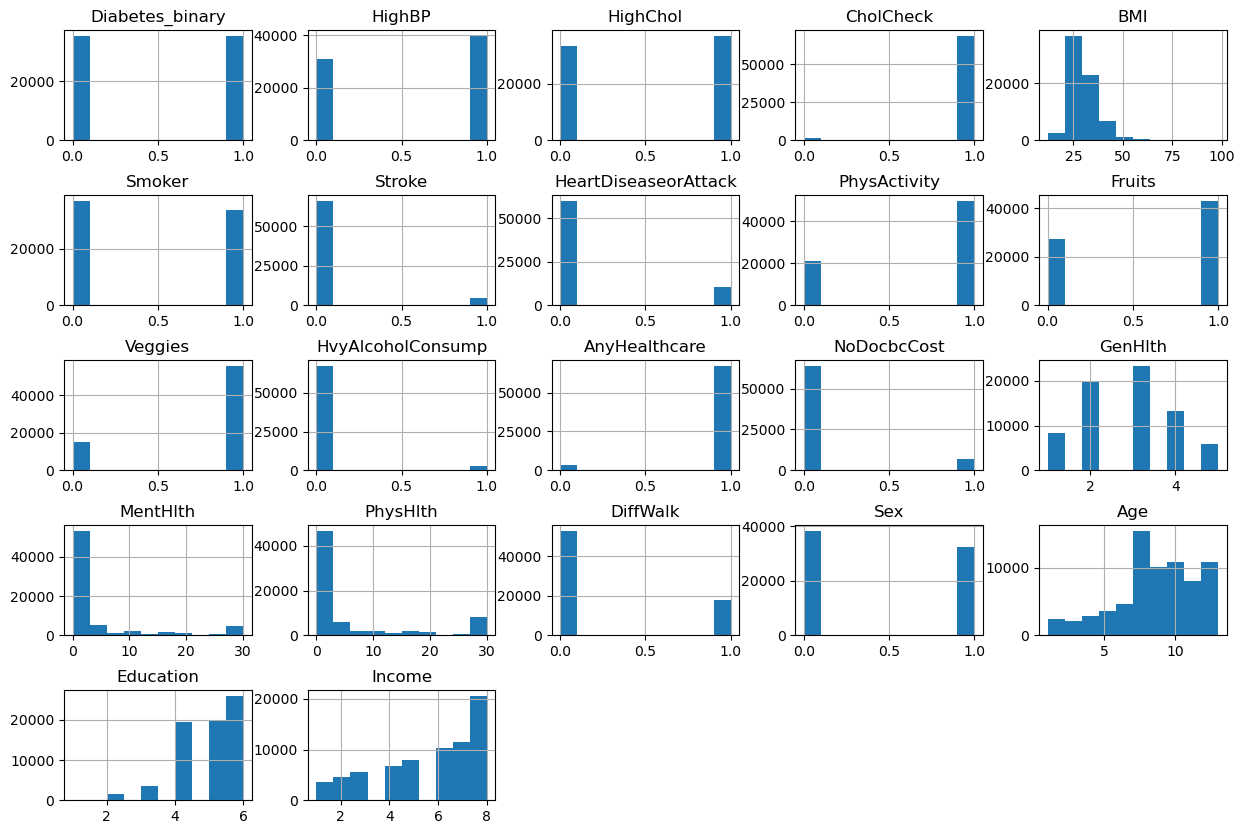

In [36]:
#Call brfss2015_dataset `hist` method to plot histograms of each of the numeric features
#Try passing it an argument figsize=(15,10)
#Try calling plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
#It's important you create legible and easy-to-read plots
brfss2015_dataset.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Above is a quick overview of the distribution of the columns of the data.

In [37]:
brfss2015_dataset.mean()

Diabetes_binary          0.500000
HighBP                   0.563458
HighChol                 0.525703
CholCheck                0.975259
BMI                     29.856985
Smoker                   0.475273
Stroke                   0.062171
HeartDiseaseorAttack     0.147810
PhysActivity             0.703036
Fruits                   0.611795
Veggies                  0.788774
HvyAlcoholConsump        0.042721
AnyHealthcare            0.954960
NoDocbcCost              0.093914
GenHlth                  2.837082
MentHlth                 3.752037
PhysHlth                 5.810417
DiffWalk                 0.252730
Sex                      0.456997
Age                      8.584055
Education                4.920953
Income                   5.698311
dtype: float64

The only non-categorical data above are BMI, MentHlth and PhysHlt. The average BMI is at the high end of the overweight range, bordering on obesity range. MentHlt averages a little under 4 days. PhysHlth averages a little under 6 days.

In [38]:
brfss2015_dataset.median()

Diabetes_binary          0.5
HighBP                   1.0
HighChol                 1.0
CholCheck                1.0
BMI                     29.0
Smoker                   0.0
Stroke                   0.0
HeartDiseaseorAttack     0.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
AnyHealthcare            1.0
NoDocbcCost              0.0
GenHlth                  3.0
MentHlth                 0.0
PhysHlth                 0.0
DiffWalk                 0.0
Sex                      0.0
Age                      9.0
Education                5.0
Income                   6.0
dtype: float64

The data on BMI, MentHlt and PhysHlt are of interest. Median of BMI is 29, which is on the overweight range. The median of MentHLT is 0 days and median of PhysHlt is 0 days.

In [39]:
brfss2015_dataset.mode().T

0    1
Diabetes_binary        0.0  1.0
HighBP                 1.0  NaN
HighChol               1.0  NaN
CholCheck              1.0  NaN
BMI                   27.0  NaN
Smoker                 0.0  NaN
Stroke                 0.0  NaN
HeartDiseaseorAttack   0.0  NaN
PhysActivity           1.0  NaN
Fruits                 1.0  NaN
Veggies                1.0  NaN
HvyAlcoholConsump      0.0  NaN
AnyHealthcare          1.0  NaN
NoDocbcCost            0.0  NaN
GenHlth                3.0  NaN
MentHlth               0.0  NaN
PhysHlth               0.0  NaN
DiffWalk               0.0  NaN
Sex                    0.0  NaN
Age                   10.0  NaN
Education              6.0  NaN
Income                 8.0  NaN

The mode of categorical data is of interest. The most common values seen are high BP, high cholesterol, check cholesterol, non-smoker, no stroke, no heart problems, performs exercises, eats fruits and veggies, not a heavy drinker, has healthcare coverage, does see the doctor independent of cost, in good health, no difficulty walking, predomintly female, 65-69 years old, at least a college graduate, and income of 75K or more. BMI is 27 still indicating overweight. No days of mental and physical health problems.

In [40]:
brfss2015_dataset.set_index('Diabetes_binary').groupby('Diabetes_binary').mean().T

Diabetes_binary             0.0        1.0
HighBP                 0.374243   0.752674
HighChol               0.381288   0.670118
CholCheck              0.957336   0.993182
BMI                   27.769960  31.944011
Smoker                 0.432326   0.518220
Stroke                 0.031885   0.092457
HeartDiseaseorAttack   0.072738   0.222882
PhysActivity           0.775533   0.630538
Fruits                 0.638149   0.585441
Veggies                0.821140   0.756408
HvyAlcoholConsump      0.061902   0.023539
AnyHealthcare          0.950150   0.959769
NoDocbcCost            0.081961   0.105868
GenHlth                2.383183   3.290981
MentHlth               3.042268   4.461806
PhysHlth               3.666355   7.954479
DiffWalk               0.134244   0.371216
Sex                    0.434872   0.479121
Age                    7.789057   9.379053
Education              5.096390   4.745516
Income                 6.186527   5.210094

This data can tell us that people with diabetes are more likely to have high BP, high cholesterol, check their cholesterol, smoker, had stroke, had heart disease, have healthcare coverage, more likely to see the doctor, generally have good health, more likely to have mental and physical health issues, more likely to have difficulty walking, more likely male, age ranging 60-64 years old. We also see diabetic have less physical activity, eats lesser fruits and veggies, less alcohol consumption,  slightly less educated and lower income. BMI of a diabetic is likely to indicate obesity.

## Summary:

The purpose of this notebook is to clean and prepare the BRFSS data into a useable format to predict the accuracy if a person might have diabetes or is at risk of diabetes by finding out what risk factors are the most predictive of diabetic risk.

The following tasks were performed. Starting with the loading of the chosen dataset. A file structure was created, pushed to GitHub and the glob library was downloaded. 

Reviewed the BRFSS2015 codebook to understand the dataset more in depth. Check the column names, shape, info, summary statistics for each of the columns and unique values of the dataset. Started cleaning the data for missing values or NaN values and duplicates. The data did not have any missing values, NaN's or any duplicates.

Looked into the value counts for each feature to understand the dataset and made a histogram for the data to see the distribution of features and see any useful values that may need to be investigated further. The value counts for each of the features gave a picture on how many people were diabetic or not, how many male or female, how many had high BP or high cholesterol and so on which may be of use in later analysis.

Also look at the mean, median and mode of the data to see if it showed any use on categorical and non-categorical features of the data. The mode of the data is of interest in that most of the features will likely help in analyzing which features would be a good predictor for diabetic risk. Lastly, group the data by diabetes_binary to further see if the features will be of use in predicting risk factors for diabetes. In here, the data showed some association with the different risk predictors for diabetes, but not conclusive. 

There is further need for investigation and data analysis to reach a more concrete conclusion.





## PART TWO

## EXPLORATORY DATA ANALYSIS

In this section:
We will identify patterns and develop hypothesis.
We will test technical assumptions and inform model selection and feature engineering.
We will build intuition of the data.


Build data profile tables and plots

Remember the question we are trying to answer:
**Finding out what risk factors are the most predictive of diabetic risk**

### EDA Major Task:
 - Form hypothesis/develop investigation themes to explore

 - Wrangle the data

 - Assess the quality of the data

 - Profile the data

 - Explore each individual variable in the dataset

 - Assess the relationship between each variable and the target

 - Assess interactions between the variables

 - Explore the data across many dimensions

In [41]:
#Start with summary statistics table
brfss2015_dataset.describe().T

count       mean        std   min   25%   50%   75%  \
Diabetes_binary       70692.0   0.500000   0.500004   0.0   0.0   0.5   1.0   
HighBP                70692.0   0.563458   0.495960   0.0   0.0   1.0   1.0   
HighChol              70692.0   0.525703   0.499342   0.0   0.0   1.0   1.0   
CholCheck             70692.0   0.975259   0.155336   0.0   1.0   1.0   1.0   
BMI                   70692.0  29.856985   7.113954  12.0  25.0  29.0  33.0   
Smoker                70692.0   0.475273   0.499392   0.0   0.0   0.0   1.0   
Stroke                70692.0   0.062171   0.241468   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  70692.0   0.147810   0.354914   0.0   0.0   0.0   0.0   
PhysActivity          70692.0   0.703036   0.456924   0.0   0.0   1.0   1.0   
Fruits                70692.0   0.611795   0.487345   0.0   0.0   1.0   1.0   
Veggies               70692.0   0.788774   0.408181   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     70692.0   0.042721   0.202228   0.0   0.0   0.0   0.0   
AnyHealthcare         70692.0   0.954960   0.207394   0.0   1.0   1.0   1.0   
NoDocbcCost           70692.0   0.093914   0.291712   0.0   0.0   0.0   0.0   
GenHlth               70692.0   2.837082   1.113565   1.0   2.0   3.0   4.0   
MentHlth              70692.0   3.752037   8.155627   0.0   0.0   0.0   2.0   
PhysHlth              70692.0   5.810417  10.062261   0.0   0.0   0.0   6.0   
DiffWalk              70692.0   0.252730   0.434581   0.0   0.0   0.0   1.0   
Sex                   70692.0   0.456997   0.498151   0.0   0.0   0.0   1.0   
Age                   70692.0   8.584055   2.852153   1.0   7.0   9.0  11.0   
Education             70692.0   4.920953   1.029081   1.0   4.0   5.0   6.0   
Income                70692.0   5.698311   2.175196   1.0   4.0   6.0   8.0   

                       max  
Diabetes_binary        1.0  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
HeartDiseaseorAttack   1.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                 8.0

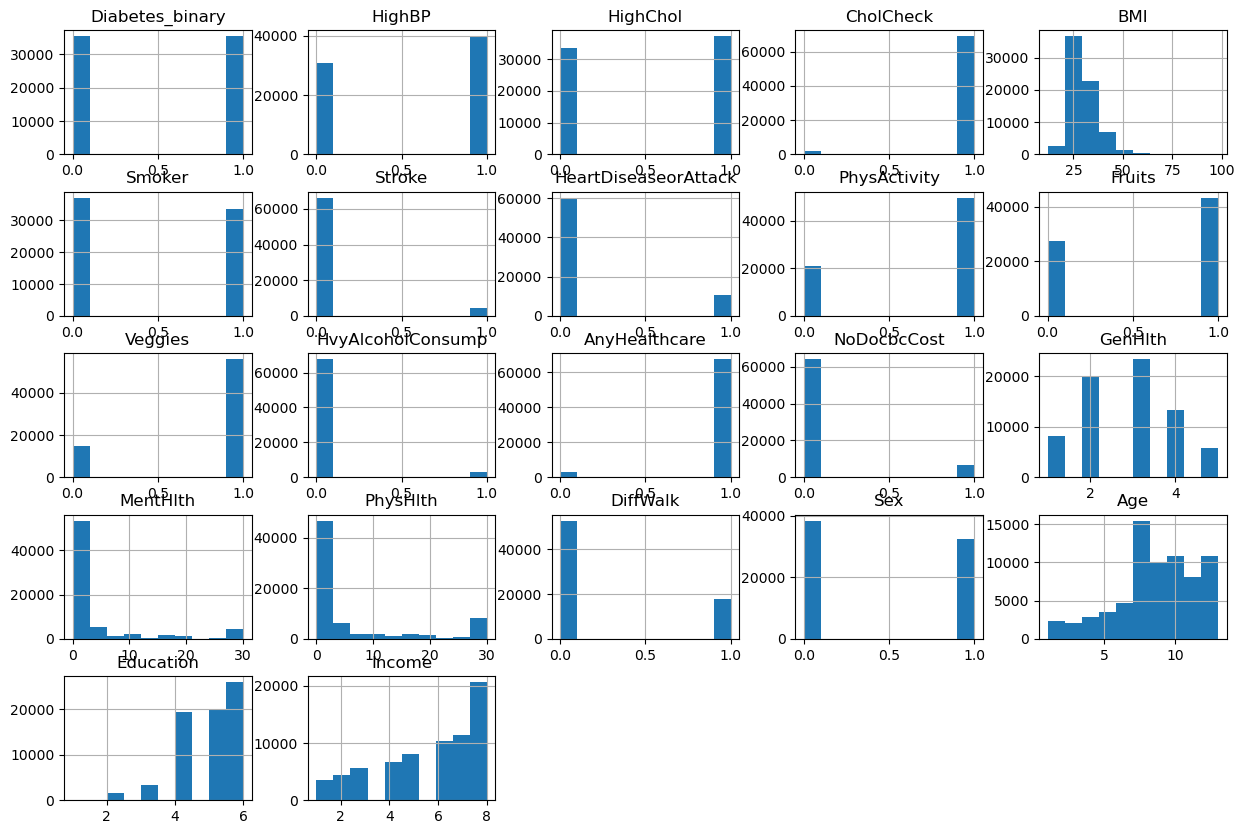

In [42]:
#Checking the individual variable distribution plots
#show histogram for each varible in the dataset
hist = brfss2015_dataset.hist(bins=10, figsize=(15,10))

In [43]:
# Generate the Pandas Profile report for EDA analysis
report = ydata_profiling.ProfileReport(brfss2015_dataset, explorative=True)
report.to_file(output_file="profile.html")
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Data Visualization of the Variables using the Boxplot:

<AxesSubplot:>

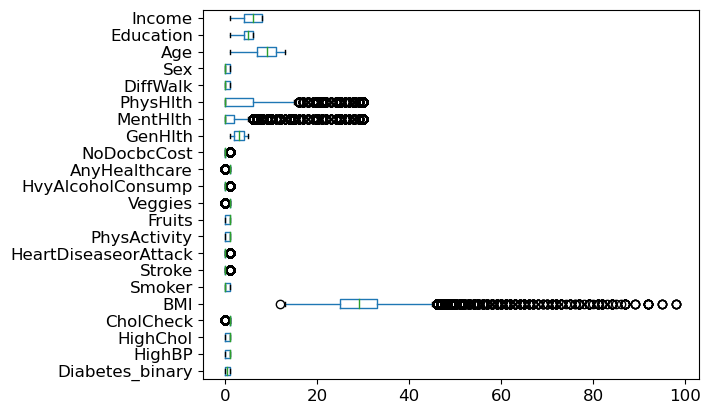

In [44]:
brfss2015_dataset.boxplot(grid=False, vert=False, fontsize=12)

Data Visualization of the Variables using the Heatmap

In [45]:
df =brfss2015_dataset.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

<AxesSubplot:>

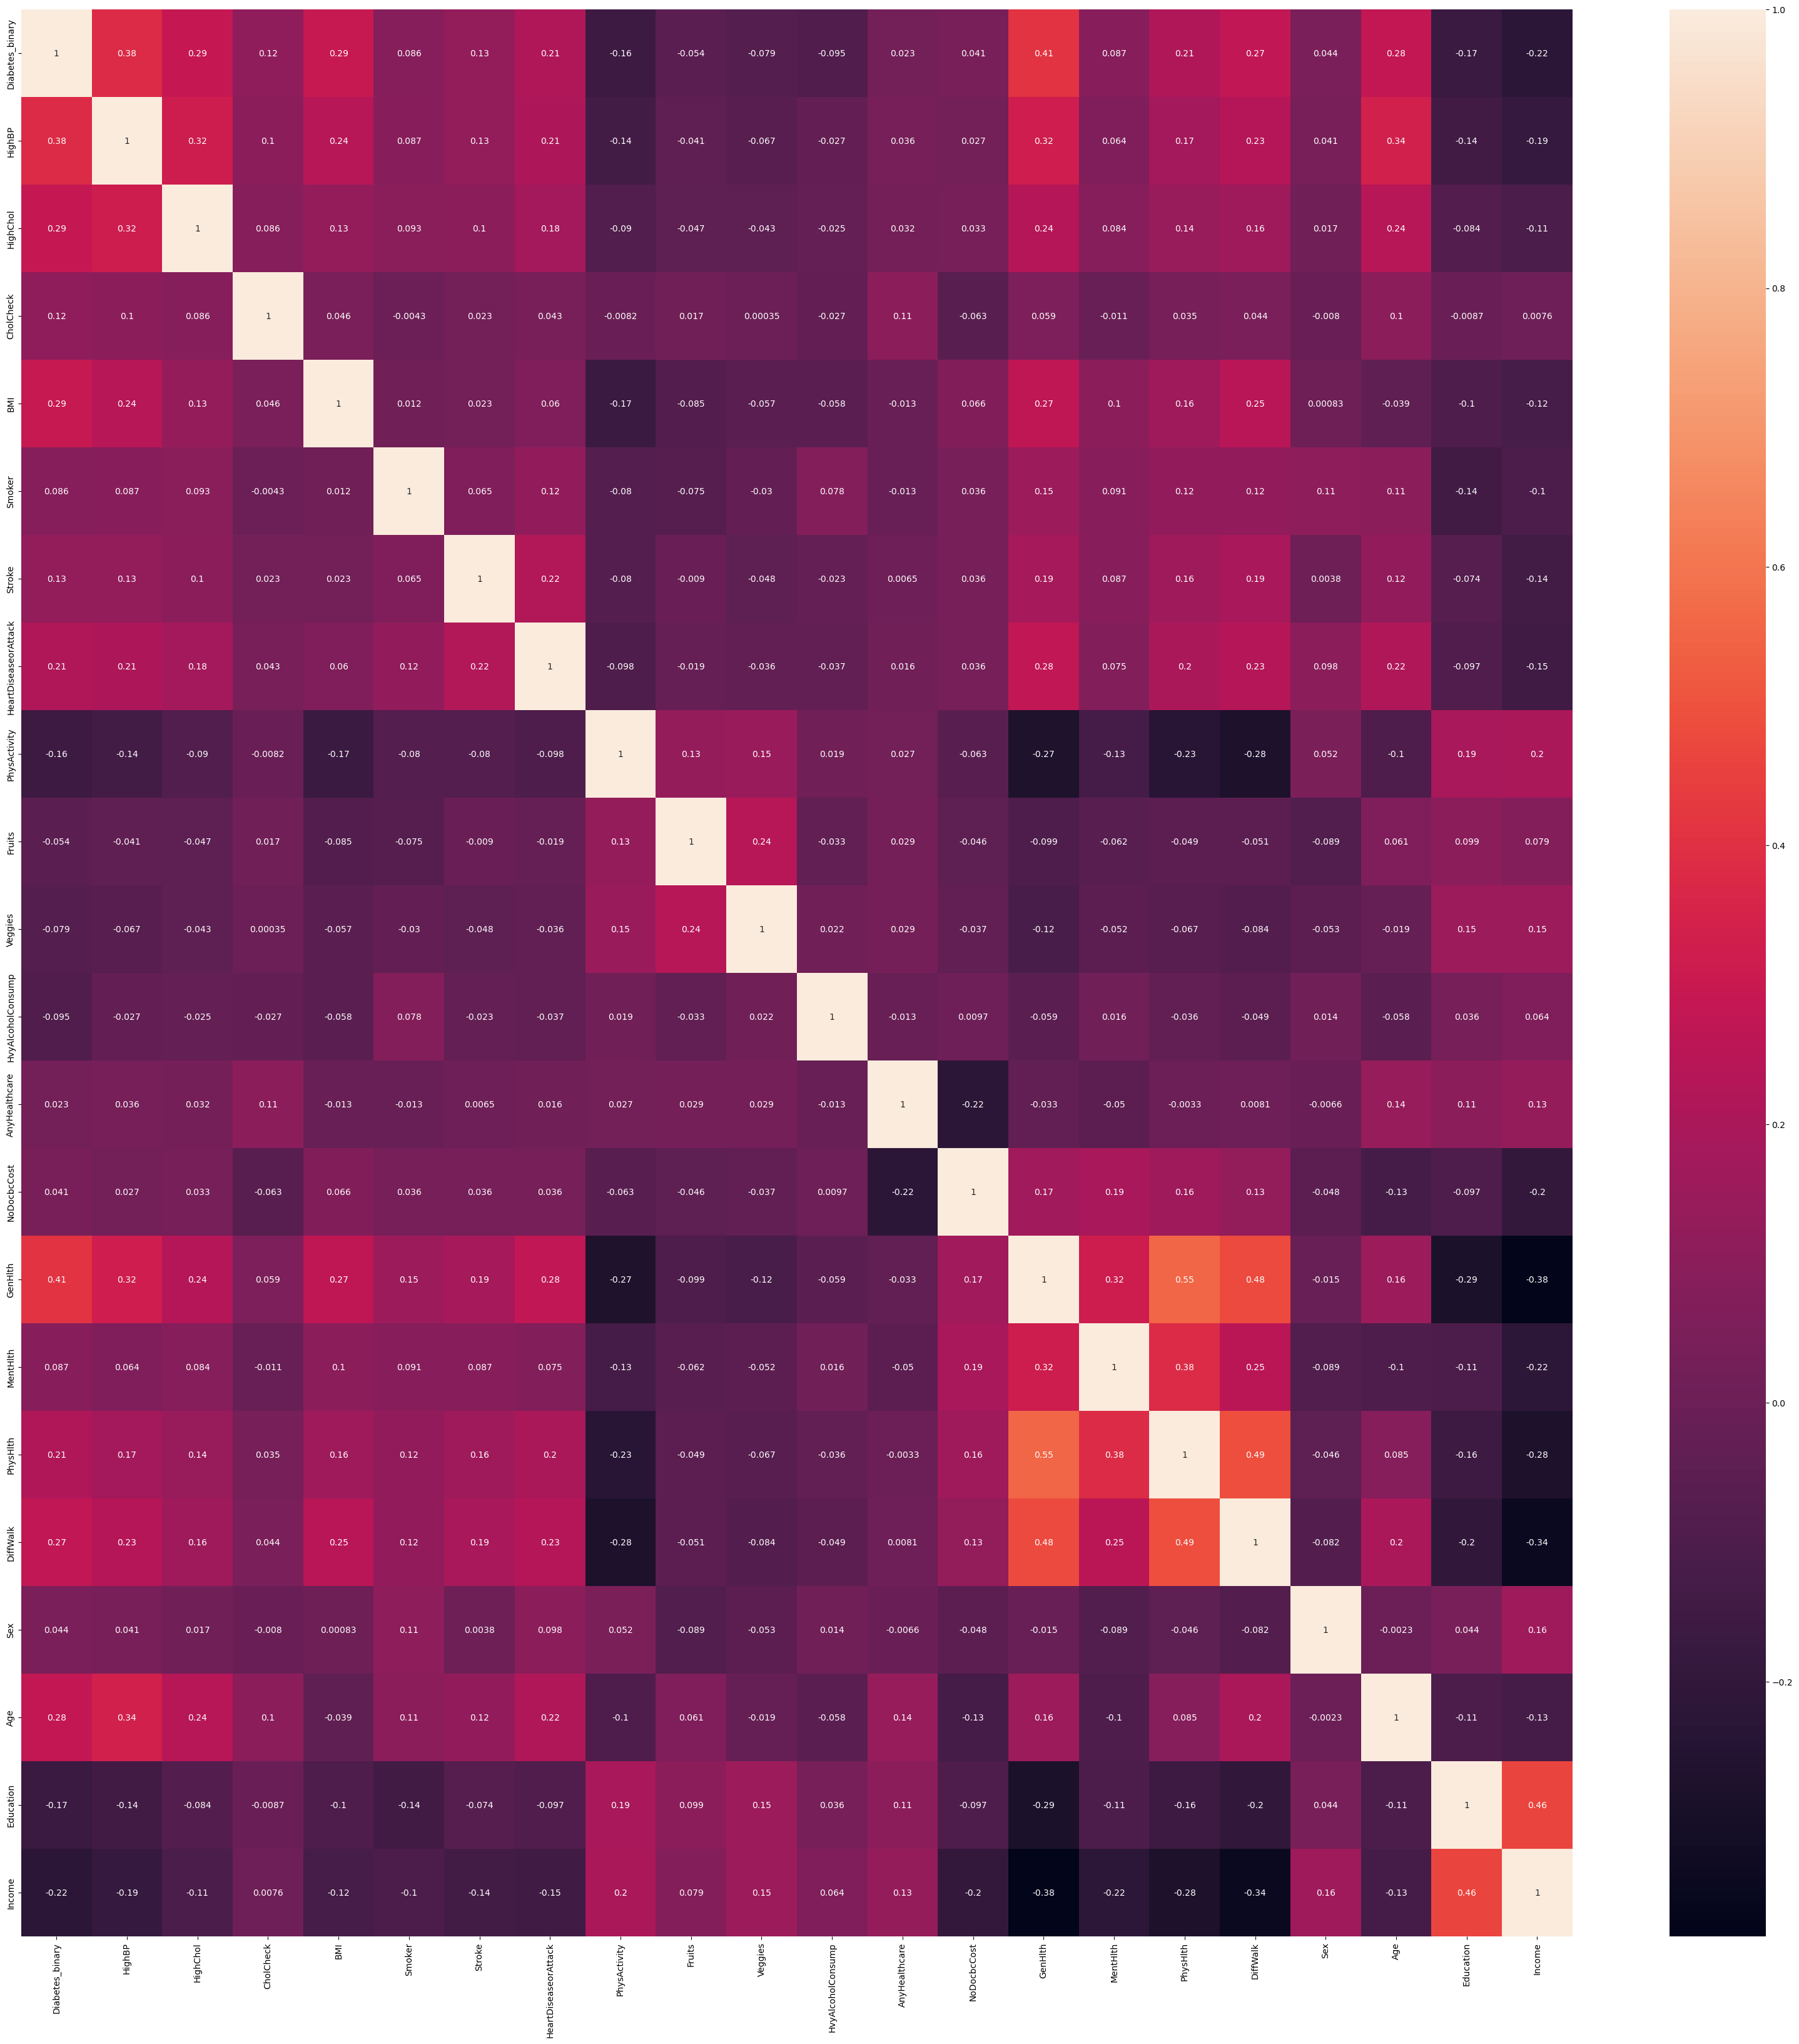

In [46]:
#Matplotlib plot is big enough
plt.figure(figsize=(40,40))
# Make a heatmap of the data 
sns.heatmap(df.corr(), annot=True)

In [47]:
#Correlation of binary and categorical data are not valid and this action provides no value
#df.corr().T

In [48]:
print("There are:", df.shape[0], 'rows.')
print("There are:", df.shape[1], 'columns')

There are: 70692 rows.
There are: 22 columns


The goal is to identify the features to use in the EDA and isolate the features that will be most helpful in constructing a predictive model.
The Diabetes_binary is being used as the variable to be predicted based on the other attributes.

What we need to solve or investigate:
**Investigating what risk factors maybe the most predictive of diabetic risk**

Let's investigate our chosen predictor/dependent variable: Diabetes_binary

array([[<AxesSubplot:title={'center':'Diabetes_binary'}>]], dtype=object)

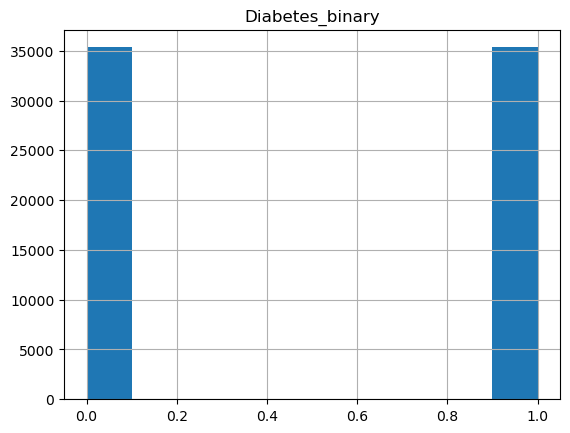

In [49]:
df.hist(column='Diabetes_binary')

In [50]:
df["Diabetes_binary"].describe()

count    70692.000000
mean         0.500000
std          0.500004
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: Diabetes_binary, dtype: float64

In [51]:
df["Diabetes_binary"].value_counts(dropna=False)

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

We are exploring the relationship between each variable and the target which is the Diabetes_binary

C:\Users\charr\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


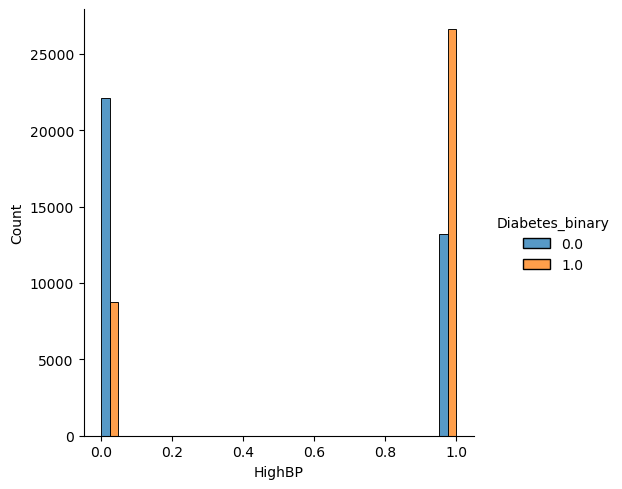

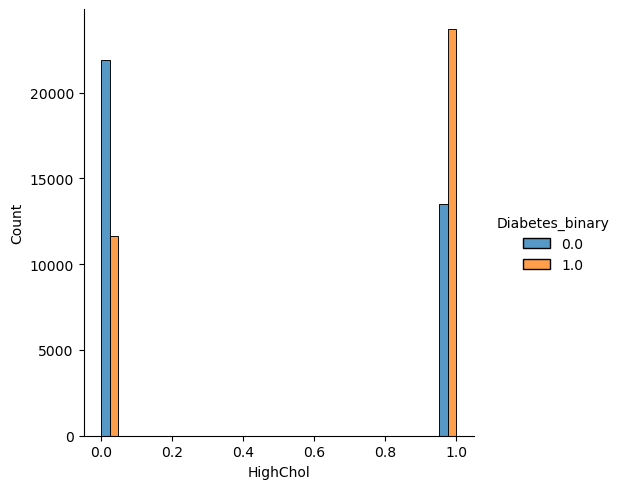

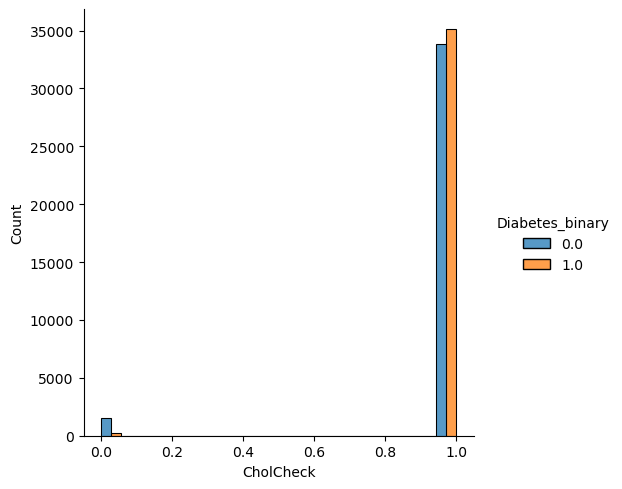

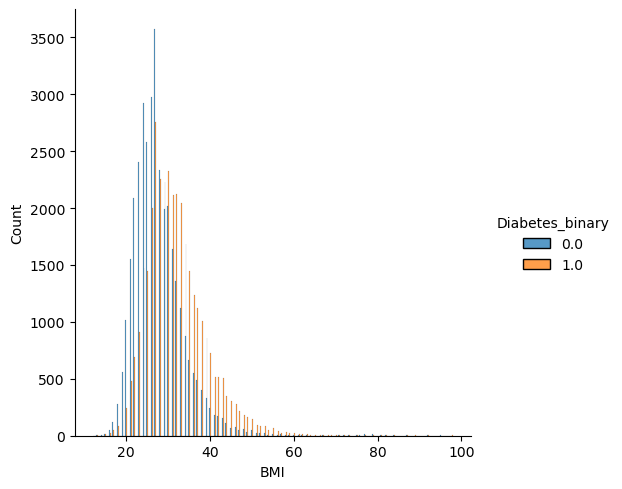

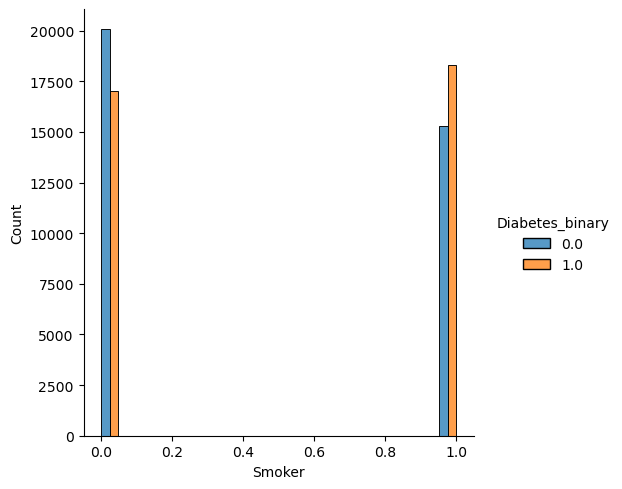

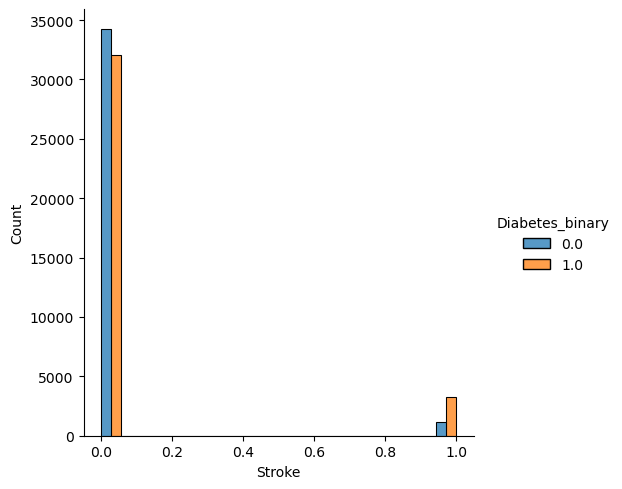

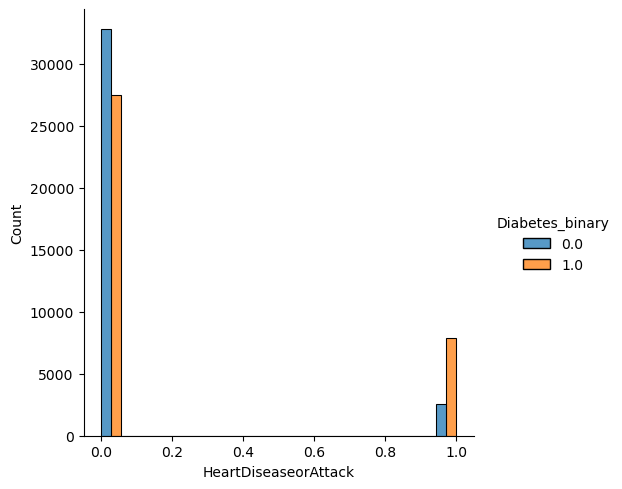

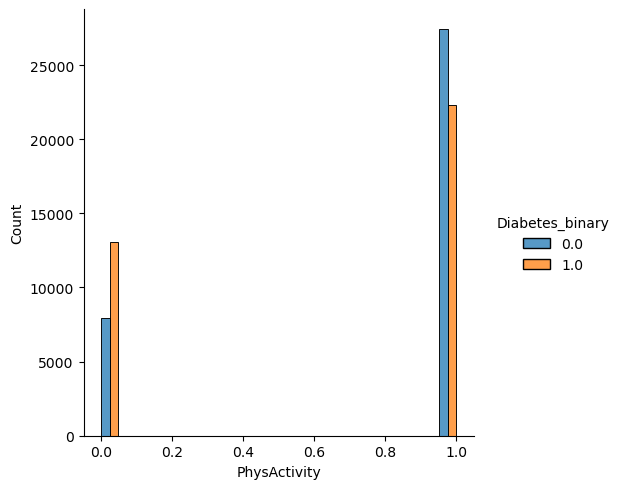

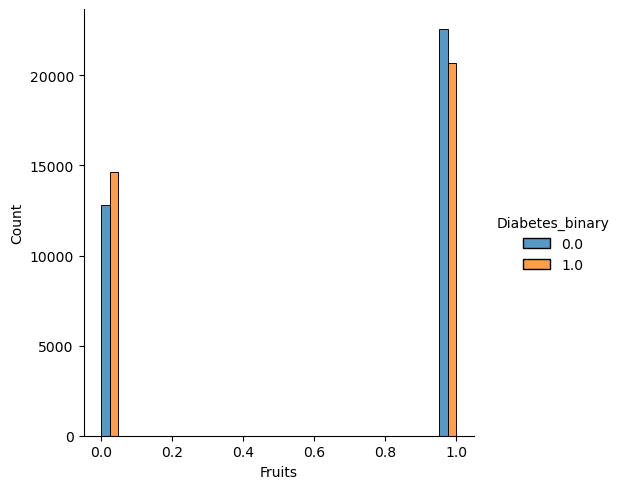

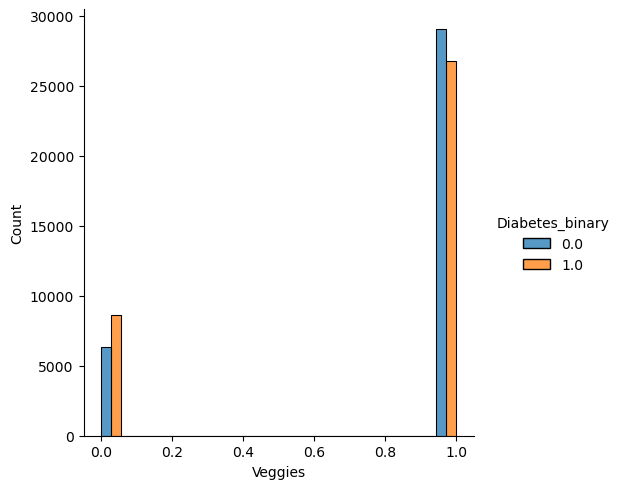

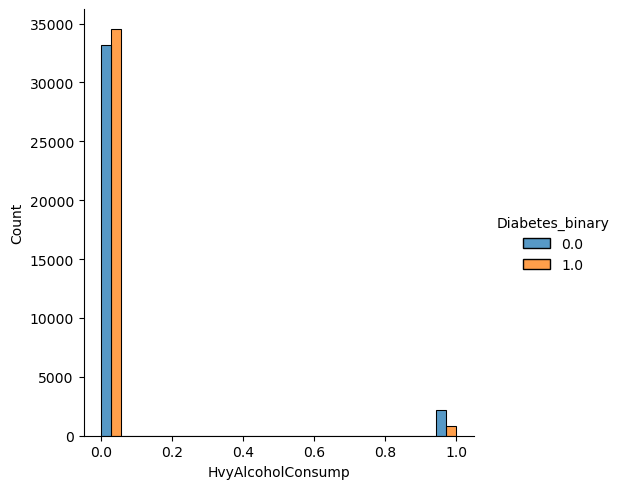

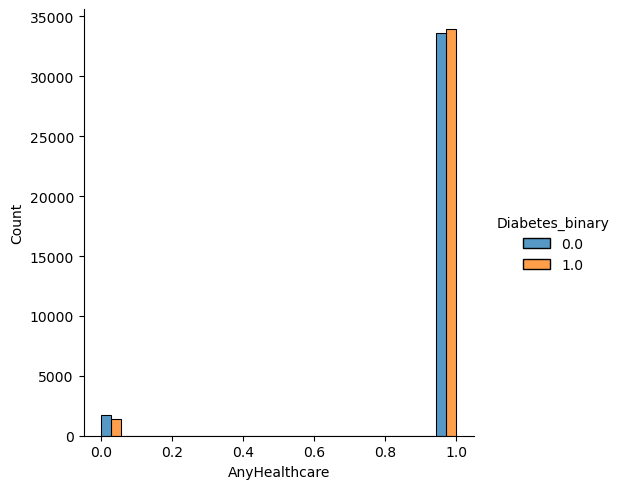

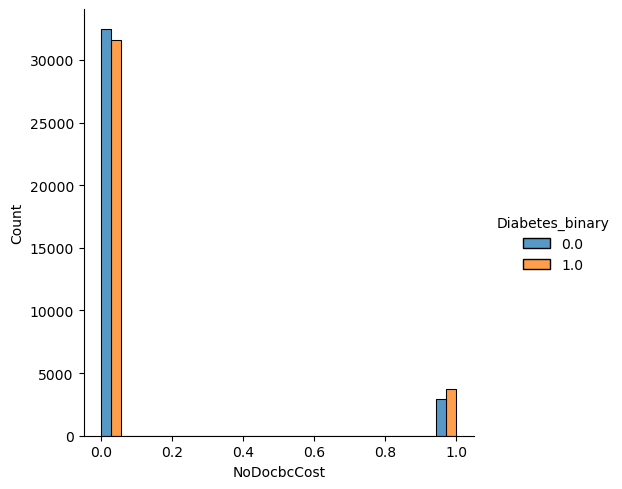

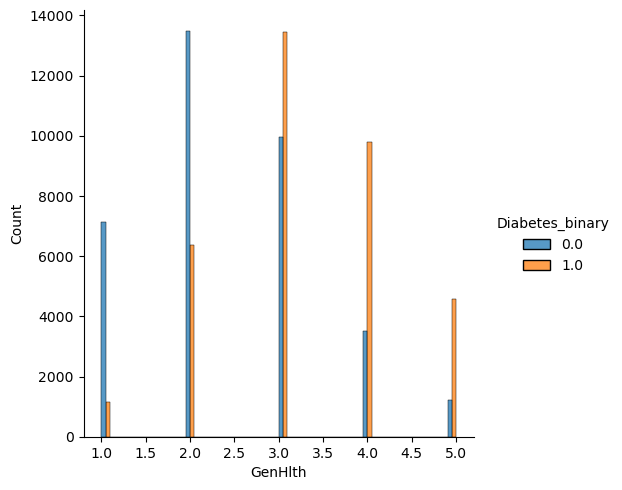

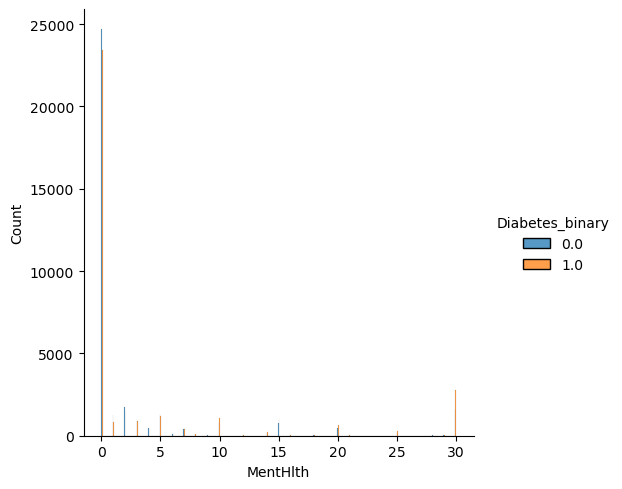

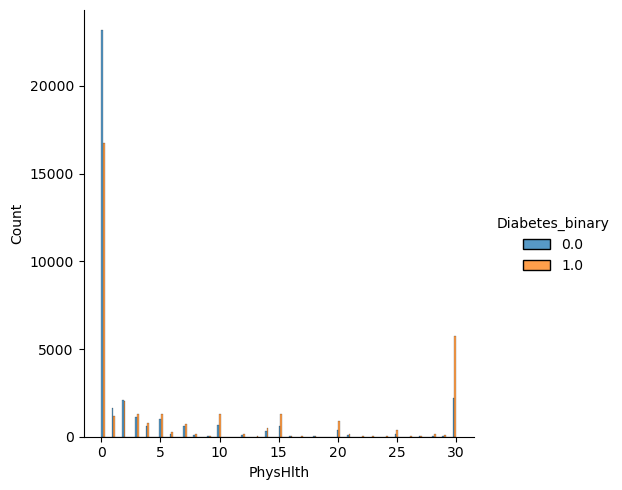

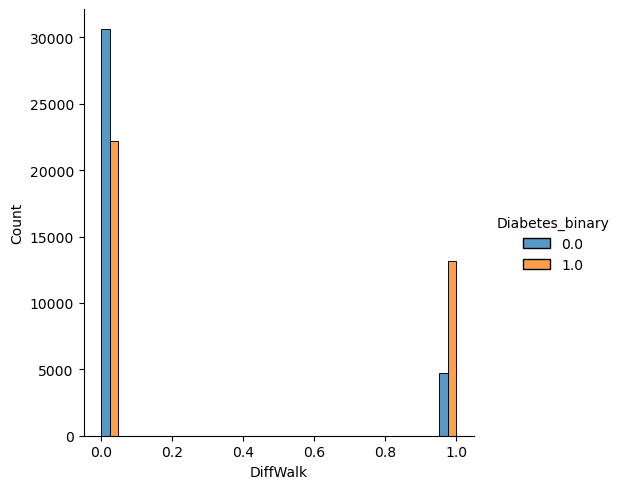

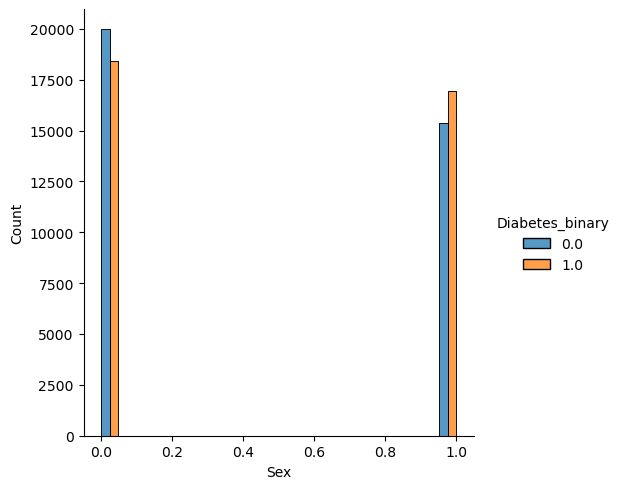

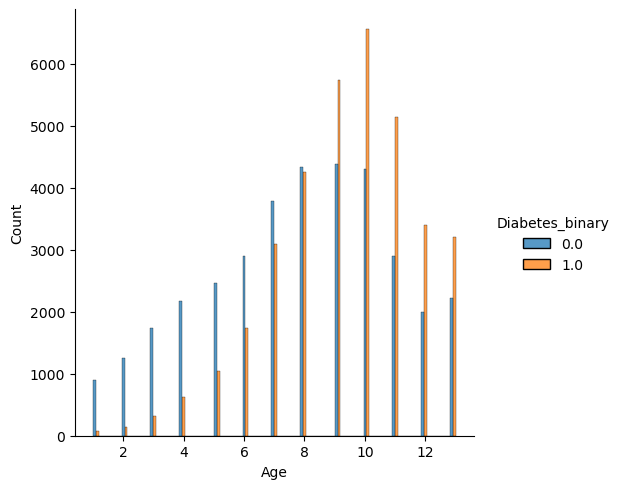

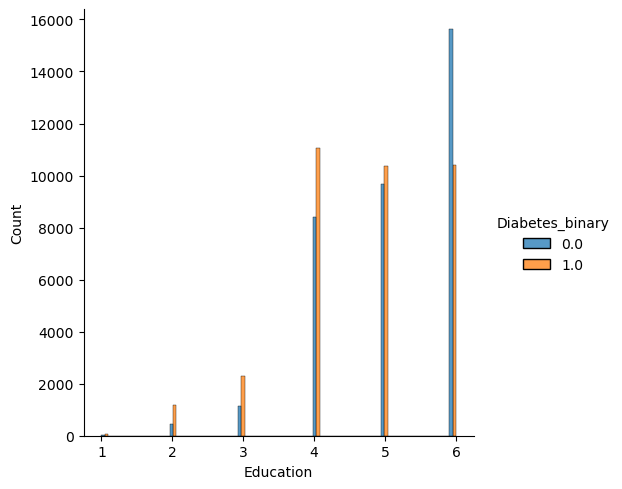

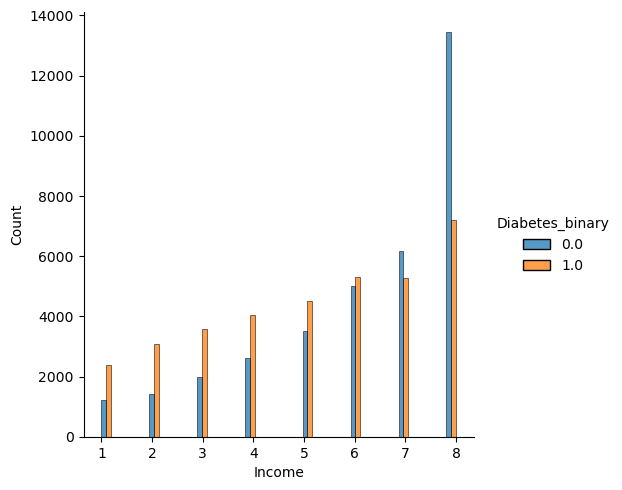

In [52]:
#Below represents histograms of all the data segregated by Diabetes_binary
for i in df.columns:
    if i != 'Diabetes_binary':
        sns.displot(df, x=i, hue='Diabetes_binary', multiple="dodge")

For PhysHlth and MentHlth, we are aggregating into smaller number of categories for eventual one-hot encoding.

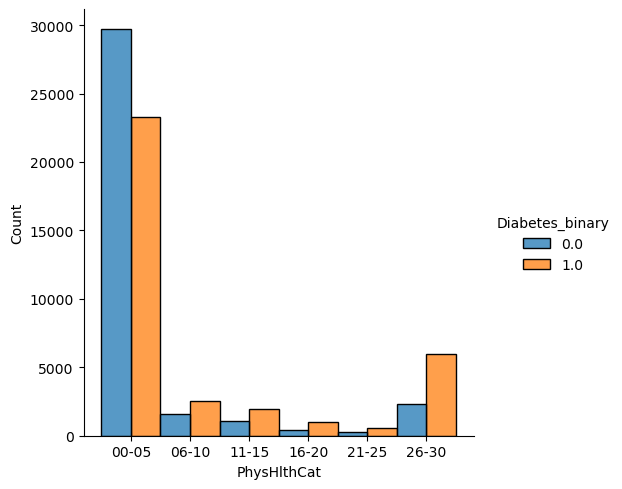

In [53]:
#Aggregated categories of PhysHlt; Simplified categories from 30 to 6 categories within a single data
df['PhysHlthCat'] = '00-05'
df['PhysHlthCat'] = np.where(((df['PhysHlth'] >= 6) & (df['PhysHlth'] <= 10)) , '06-10', df['PhysHlthCat'])
df['PhysHlthCat'] = np.where(((df['PhysHlth'] >= 11) & (df['PhysHlth'] <= 15)) , '11-15', df['PhysHlthCat'])
df['PhysHlthCat'] = np.where(((df['PhysHlth'] >= 16) & (df['PhysHlth'] <= 20)) , '16-20', df['PhysHlthCat'])
df['PhysHlthCat'] = np.where(((df['PhysHlth'] >= 21) & (df['PhysHlth'] <= 25)) , '21-25', df['PhysHlthCat'])
df['PhysHlthCat'] = np.where(((df['PhysHlth'] >= 26) & (df['PhysHlth'] <= 30)) , '26-30', df['PhysHlthCat'])
df.sort_values(by=['PhysHlthCat'], inplace=True)
df.drop(labels='PhysHlth', axis=1, inplace=True)
sns.displot(df, x='PhysHlthCat', hue='Diabetes_binary', multiple="dodge")

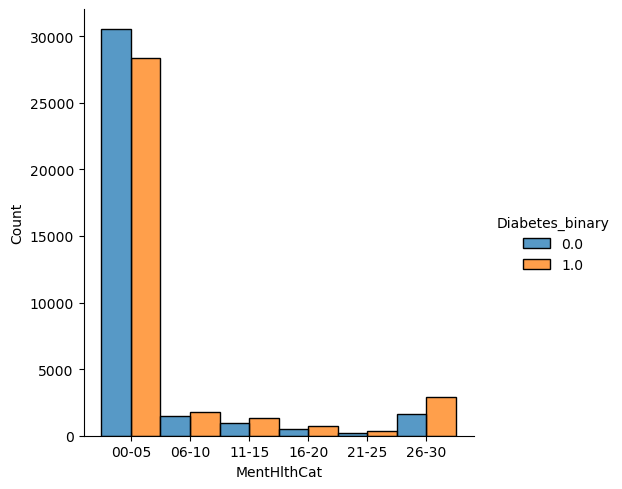

In [54]:
#Aggregated categories of MentHlt; Simplified categories from 30 to 6 categories within a single data
df['MentHlthCat'] = '00-05'
df['MentHlthCat'] = np.where(((df['MentHlth'] >= 6) & (df['MentHlth'] <= 10)) , '06-10', df['MentHlthCat'])
df['MentHlthCat'] = np.where(((df['MentHlth'] >= 11) & (df['MentHlth'] <= 15)) , '11-15', df['MentHlthCat'])
df['MentHlthCat'] = np.where(((df['MentHlth'] >= 16) & (df['MentHlth'] <= 20)) , '16-20', df['MentHlthCat'])
df['MentHlthCat'] = np.where(((df['MentHlth'] >= 21) & (df['MentHlth'] <= 25)) , '21-25', df['MentHlthCat'])
df['MentHlthCat'] = np.where(((df['MentHlth'] >= 26) & (df['MentHlth'] <= 30)) , '26-30', df['MentHlthCat'])
df.sort_values(by=['MentHlthCat'], inplace=True)
df.drop(labels='MentHlth', axis=1, inplace=True)
sns.displot(data=df, x='MentHlthCat', hue='Diabetes_binary', multiple="dodge")

Scaling the BMI data to reduce the possible overemphasizing of the BMI data in the modeling

In [55]:
# Min/Max Scaling of the BMI data
df['BMI'] = (df['BMI']-df['BMI'].min())/(df['BMI'].max()-df['BMI'].min())
df['BMI'].describe()

count    70692.000000
mean         0.207639
std          0.082720
min          0.000000
25%          0.151163
50%          0.197674
75%          0.244186
max          1.000000
Name: BMI, dtype: float64

In [56]:
# OneHotEncoding of the categorical data
df_new = pd.get_dummies(df, columns=['GenHlth', 'MentHlthCat', 'PhysHlthCat', 'Age', 'Education', 'Income'])
df_new.describe().T

count      mean       std  min       25%       50%  \
Diabetes_binary       70692.0  0.500000  0.500004  0.0  0.000000  0.500000   
HighBP                70692.0  0.563458  0.495960  0.0  0.000000  1.000000   
HighChol              70692.0  0.525703  0.499342  0.0  0.000000  1.000000   
CholCheck             70692.0  0.975259  0.155336  0.0  1.000000  1.000000   
BMI                   70692.0  0.207639  0.082720  0.0  0.151163  0.197674   
Smoker                70692.0  0.475273  0.499392  0.0  0.000000  0.000000   
Stroke                70692.0  0.062171  0.241468  0.0  0.000000  0.000000   
HeartDiseaseorAttack  70692.0  0.147810  0.354914  0.0  0.000000  0.000000   
PhysActivity          70692.0  0.703036  0.456924  0.0  0.000000  1.000000   
Fruits                70692.0  0.611795  0.487345  0.0  0.000000  1.000000   
Veggies               70692.0  0.788774  0.408181  0.0  1.000000  1.000000   
HvyAlcoholConsump     70692.0  0.042721  0.202228  0.0  0.000000  0.000000   
AnyHealthcare         70692.0  0.954960  0.207394  0.0  1.000000  1.000000   
NoDocbcCost           70692.0  0.093914  0.291712  0.0  0.000000  0.000000   
DiffWalk              70692.0  0.252730  0.434581  0.0  0.000000  0.000000   
Sex                   70692.0  0.456997  0.498151  0.0  0.000000  0.000000   
GenHlth_1.0           70692.0  0.117156  0.321608  0.0  0.000000  0.000000   
GenHlth_2.0           70692.0  0.281107  0.449543  0.0  0.000000  0.000000   
GenHlth_3.0           70692.0  0.331395  0.470718  0.0  0.000000  0.000000   
GenHlth_4.0           70692.0  0.188183  0.390861  0.0  0.000000  0.000000   
GenHlth_5.0           70692.0  0.082159  0.274609  0.0  0.000000  0.000000   
MentHlthCat_00-05     70692.0  0.832852  0.373110  0.0  1.000000  1.000000   
MentHlthCat_06-10     70692.0  0.046158  0.209829  0.0  0.000000  0.000000   
MentHlthCat_11-15     70692.0  0.032154  0.176409  0.0  0.000000  0.000000   
MentHlthCat_16-20     70692.0  0.017258  0.130232  0.0  0.000000  0.000000   
MentHlthCat_21-25     70692.0  0.007837  0.088179  0.0  0.000000  0.000000   
MentHlthCat_26-30     70692.0  0.063741  0.244293  0.0  0.000000  0.000000   
PhysHlthCat_00-05     70692.0  0.749958  0.433040  0.0  0.000000  1.000000   
PhysHlthCat_06-10     70692.0  0.057772  0.233313  0.0  0.000000  0.000000   
PhysHlthCat_11-15     70692.0  0.041985  0.200556  0.0  0.000000  0.000000   
PhysHlthCat_16-20     70692.0  0.020328  0.141119  0.0  0.000000  0.000000   
PhysHlthCat_21-25     70692.0  0.012279  0.110127  0.0  0.000000  0.000000   
PhysHlthCat_26-30     70692.0  0.117680  0.322231  0.0  0.000000  0.000000   
Age_1.0               70692.0  0.013849  0.116864  0.0  0.000000  0.000000   
Age_2.0               70692.0  0.019748  0.139133  0.0  0.000000  0.000000   
Age_3.0               70692.0  0.028985  0.167765  0.0  0.000000  0.000000   
Age_4.0               70692.0  0.039509  0.194805  0.0  0.000000  0.000000   
Age_5.0               70692.0  0.049793  0.217520  0.0  0.000000  0.000000   
Age_6.0               70692.0  0.065750  0.247846  0.0  0.000000  0.000000   
Age_7.0               70692.0  0.097210  0.296246  0.0  0.000000  0.000000   
Age_8.0               70692.0  0.121697  0.326938  0.0  0.000000  0.000000   
Age_9.0               70692.0  0.143043  0.350119  0.0  0.000000  0.000000   
Age_10.0              70692.0  0.153568  0.360536  0.0  0.000000  0.000000   
Age_11.0              70692.0  0.113789  0.317558  0.0  0.000000  0.000000   
Age_12.0              70692.0  0.076303  0.265484  0.0  0.000000  0.000000   
Age_13.0              70692.0  0.076756  0.266205  0.0  0.000000  0.000000   
Education_1.0         70692.0  0.001061  0.032555  0.0  0.000000  0.000000   
Education_2.0         70692.0  0.023298  0.150850  0.0  0.000000  0.000000   
Education_3.0         70692.0  0.048761  0.215369  0.0  0.000000  0.000000   
Education_4.0         70692.0  0.275463  0.446750  0.0  0.000000  0.000000   
Education_5.0         70692.0  0.283342  0.450

In [57]:
df_new.shape

(70692, 60)

We will assess the various attributes to see if there is a statistical difference between the diabetics and non-diabetics.
Attributes that are the same will have no predictive value later and can be dropped.

In [58]:
# Hypotheis testing to determine if there is a difference between Diabetics and Non-Diabetics
# two-sided test, to test for equality between diabetics and non-diabetics
# x0 = number of non-diabetics with a given attribute
# x1 = number of diabetics with a given attribute
# n0 = number of non-diabetics (total)
# n1 = number of diabetics (total)
# pval <= 0.05 we are treating as significant

n0 = df_new[df_new['Diabetes_binary'] == 0].Diabetes_binary.count()
n1 = df_new[df_new['Diabetes_binary'] == 1].Diabetes_binary.count()
total_cnts = np.array([n0, n1])

for i in df_new.columns:
    if i != 'Diabetes_binary' and i != 'BMI':
        x0 = df_new[(df_new['Diabetes_binary'] == 0) & (df_new[i] == 1)].Diabetes_binary.count()
        x1 = df_new[(df_new['Diabetes_binary'] == 1) & (df_new[i] == 1)].Diabetes_binary.count()
        success_cnts = np.array([x0, x1])
        test_stat, pval = proportions_ztest(count=success_cnts, nobs=total_cnts, alternative='two-sided')
        if pval <= .05:
            decision = "KEEP Attribute - different" # May have predictive value
            color = Style.RESET_ALL
        else:
            decision = 'REJECT Attribute - same' # Does not look like it has predictive value 
            color = Fore.RED
        print(color + '{}, two sided z-test: z = {:.4f}, p value = {:.4f} {}'.format(i, test_stat, pval, decision) + Style.RESET_ALL)

HighBP, two sided z-test: z = -101.4372, p value = 0.0000 KEEP Attribute - different
HighChol, two sided z-test: z = -76.8958, p value = 0.0000 KEEP Attribute - different
CholCheck, two sided z-test: z = -30.6776, p value = 0.0000 KEEP Attribute - different
Smoker, two sided z-test: z = -22.8654, p value = 0.0000 KEEP Attribute - different
Stroke, two sided z-test: z = -33.3484, p value = 0.0000 KEEP Attribute - different
HeartDiseaseorAttack, two sided z-test: z = -56.2398, p value = 0.0000 KEEP Attribute - different
PhysActivity, two sided z-test: z = 42.1860, p value = 0.0000 KEEP Attribute - different
Fruits, two sided z-test: z = 14.3779, p value = 0.0000 KEEP Attribute - different
Veggies, two sided z-test: z = 21.0824, p value = 0.0000 KEEP Attribute - different
HvyAlcoholConsump, two sided z-test: z = 25.2195, p value = 0.0000 KEEP Attribute - different
AnyHealthcare, two sided z-test: z = -6.1659, p value = 0.0000 KEEP Attribute - different
NoDocbcCost, two sided z-test: z = -

Based on the result of the p-value, almost all of the attributes are significantly different between diabetics and non-diabetics.
We see one age category that does not seem to have any predictive influence.
Further investigation of which of these are of value when we get to modeling.

In [59]:
# Do Diabetics have a higer BMI then Non-Diabetics?
# Null Hypothesis: Non-Diabetics BMI is >= Diabetics BMI.
# Alternate: Non-diabetics BMI < Diabetics BMI

arr0 = ws.DescrStatsW(df_new[df_new['Diabetes_binary'] == 0]['BMI'])
arr1 = ws.DescrStatsW(df_new[df_new['Diabetes_binary'] == 1]['BMI'])
    
cm_obj = ws.CompareMeans(arr0, arr1)
zstat, z_pval = cm_obj.ztest_ind(usevar='unequal', alternative='smaller', value=0)

if pval <= .05:
    decision = "Diabetics have a higher BMI than Non-diabetics" # May have predictive value
    color = Style.RESET_ALL
else:
    decision = 'Non-diabetics have a higher BMI than Diabetics' # Does not look like it has predictive value 
    color = Fore.RED
print(color + 'BMI, Lower tailed z-test: z = {:.4f}, p value = {:.4f} {}'.format(zstat, z_pval, decision) + Style.RESET_ALL)

BMI, Lower tailed z-test: z = -81.5909, p value = 0.0000 Diabetics have a higher BMI than Non-diabetics


Based on the results, we see that the Diabetics have a higher BMI than Non-diabetics. This would indicate BMI maybe a predictor of Diabetes.

In [60]:
obs_difference=df_new[df_new['Diabetes_binary'] == 0]['BMI'].mean() - df_new[df_new['Diabetes_binary'] == 1]['BMI'].mean()
obs_difference

-0.04853547455781834

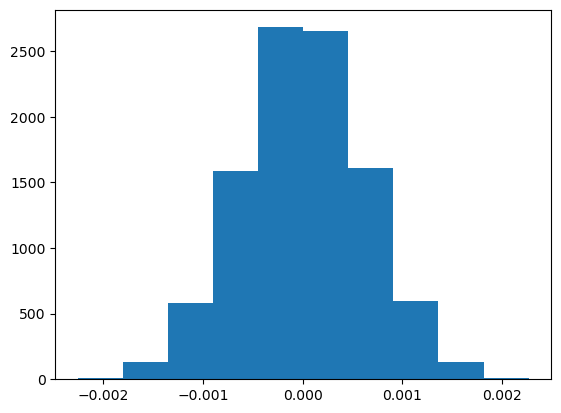

In [61]:
# First, make a list called difference.
difference = list()

# Now make a for loop that does the following 10,000 times:
# 1. makes a permutation of the 'BMI' as you did above
# 2. calculates the difference in the mean BMI of the Non-diabetics and Diabetics 
for i in range(10000):
    permutation = np.random.permutation(df_new['BMI'])
    difference.append(np.mean(permutation[df_new['Diabetes_binary']== 0] - 
                              np.mean(permutation[df_new['Diabetes_binary']== 1])))

# Make a variable called 'histo', and assign to it the result of plotting a histogram of the difference list. 
histo = plt.hist(difference)

In [62]:
count= sum(1 for i in difference if i > obs_difference)
count

10000

In [63]:
p_value =  count / 10000
p_value

1.0

Based on the Permutation test,  we see that the BMI of Diabetics is different from the BMI of Non-diabetics. 

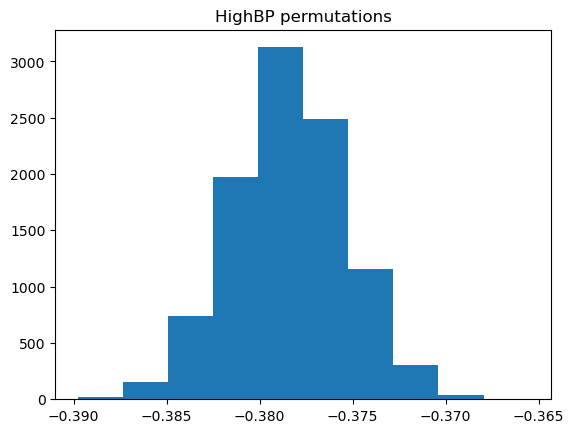

HighBP, permutation test: p value = 0.5014 KEEP Attribute - different


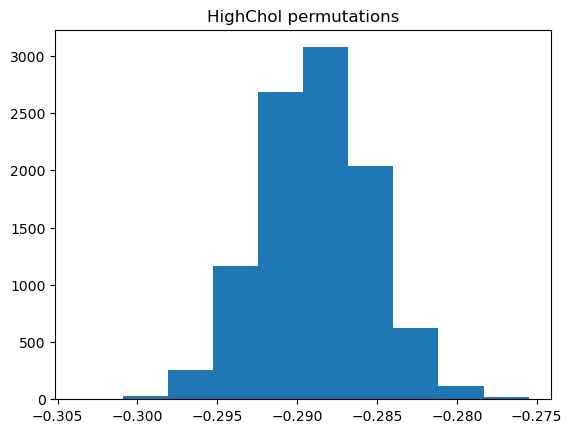

HighChol, permutation test: p value = 0.4970 KEEP Attribute - different


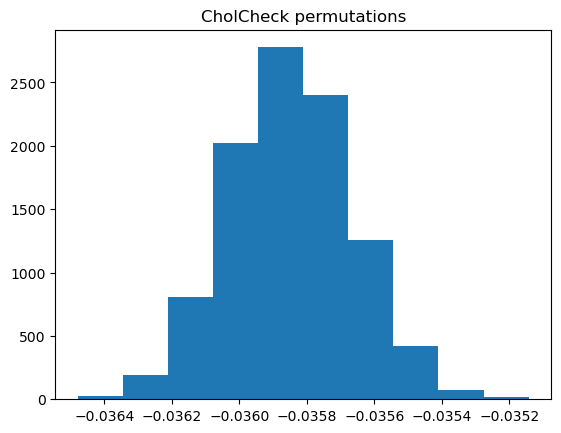

CholCheck, permutation test: p value = 0.4948 KEEP Attribute - different


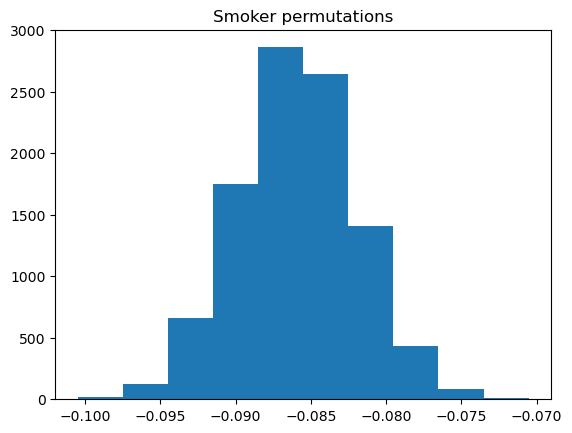

Smoker, permutation test: p value = 0.4960 KEEP Attribute - different


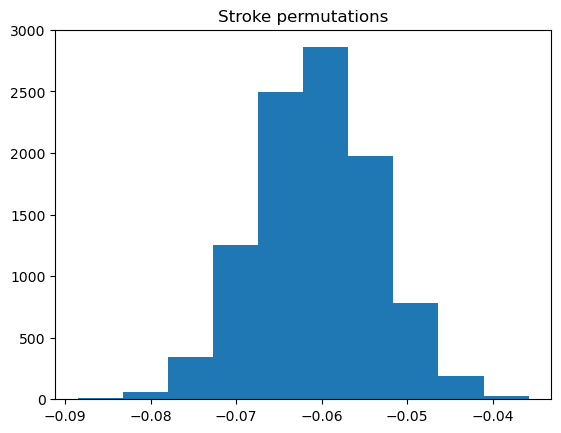

Stroke, permutation test: p value = 0.4924 KEEP Attribute - different


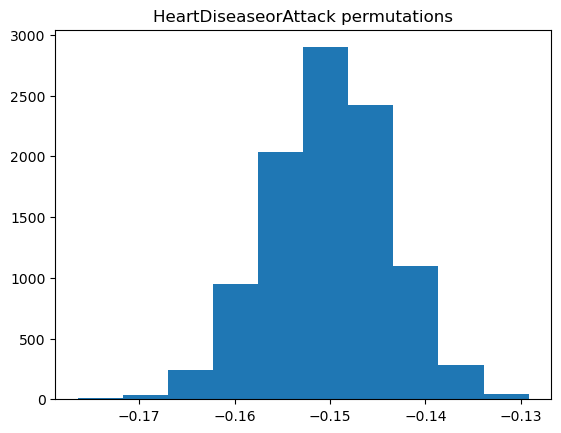

HeartDiseaseorAttack, permutation test: p value = 0.5160 KEEP Attribute - different


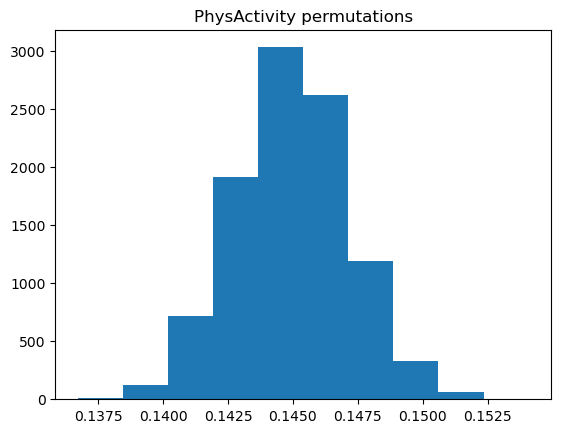

PhysActivity, permutation test: p value = 0.4947 KEEP Attribute - different


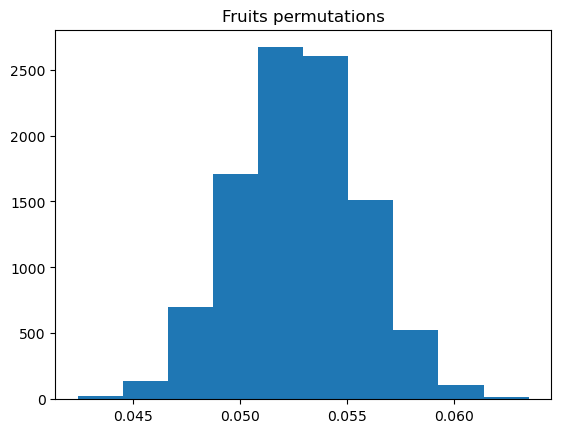

Fruits, permutation test: p value = 0.5078 KEEP Attribute - different


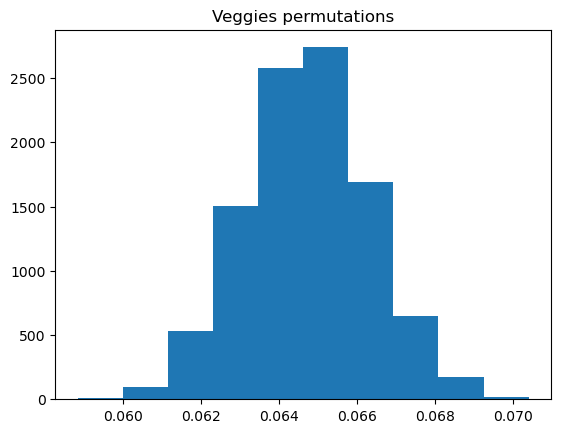

Veggies, permutation test: p value = 0.5008 KEEP Attribute - different


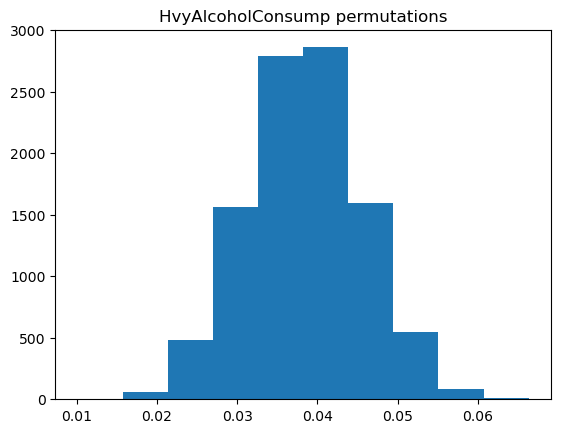

HvyAlcoholConsump, permutation test: p value = 0.5018 KEEP Attribute - different


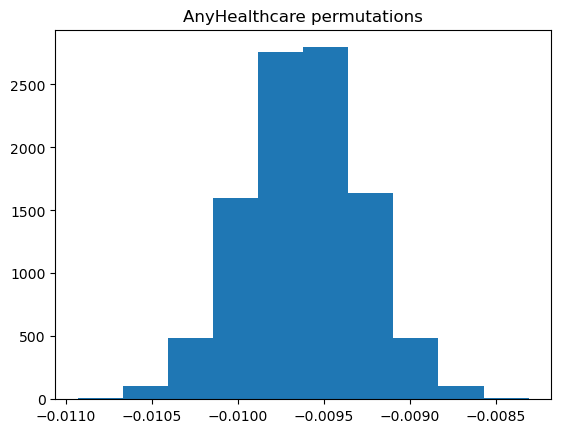

AnyHealthcare, permutation test: p value = 0.5028 KEEP Attribute - different


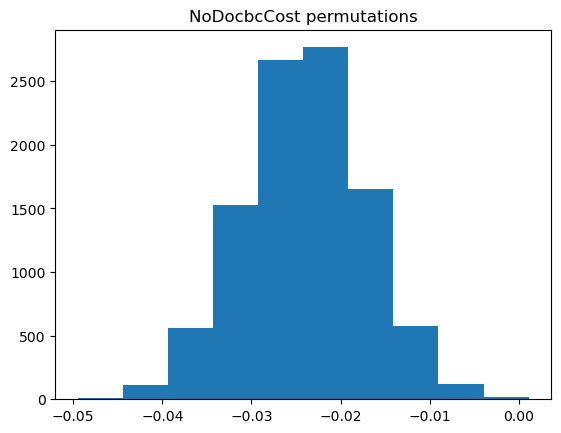

NoDocbcCost, permutation test: p value = 0.4967 KEEP Attribute - different


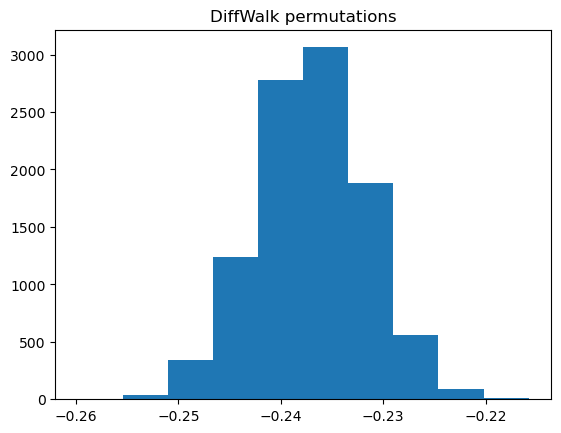

DiffWalk, permutation test: p value = 0.5009 KEEP Attribute - different


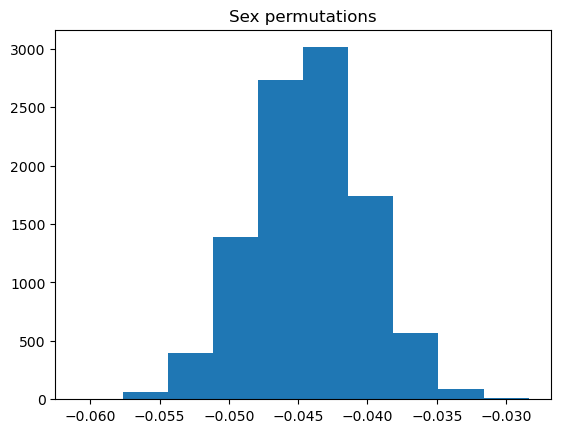

Sex, permutation test: p value = 0.5035 KEEP Attribute - different


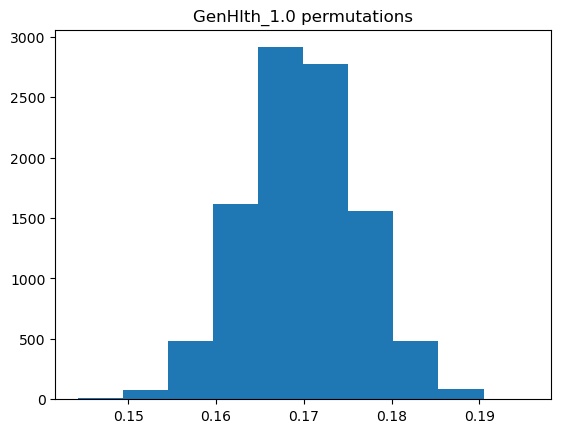

GenHlth_1.0, permutation test: p value = 0.4978 KEEP Attribute - different


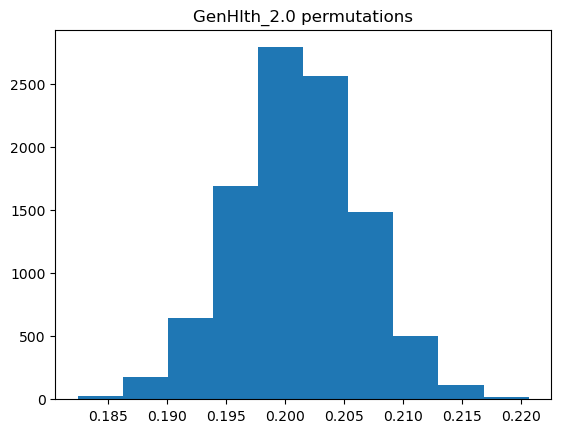

GenHlth_2.0, permutation test: p value = 0.4953 KEEP Attribute - different


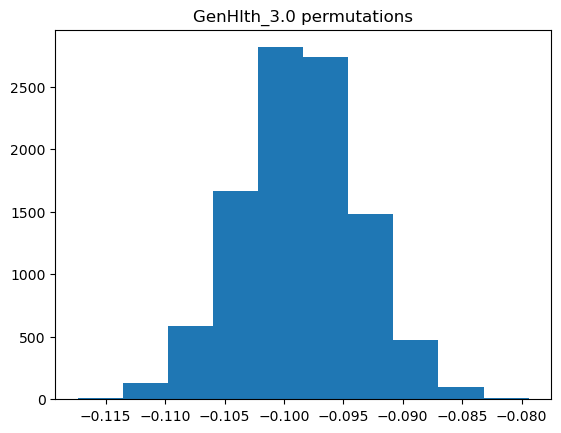

GenHlth_3.0, permutation test: p value = 0.5028 KEEP Attribute - different


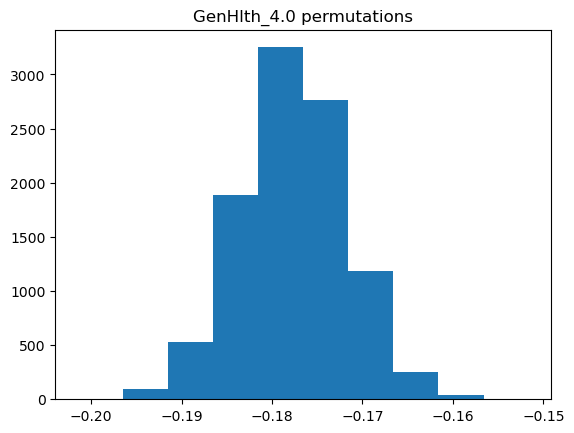

GenHlth_4.0, permutation test: p value = 0.4938 KEEP Attribute - different


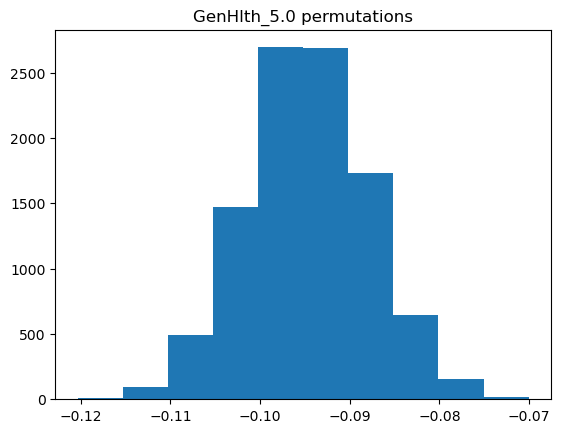

GenHlth_5.0, permutation test: p value = 0.4964 KEEP Attribute - different


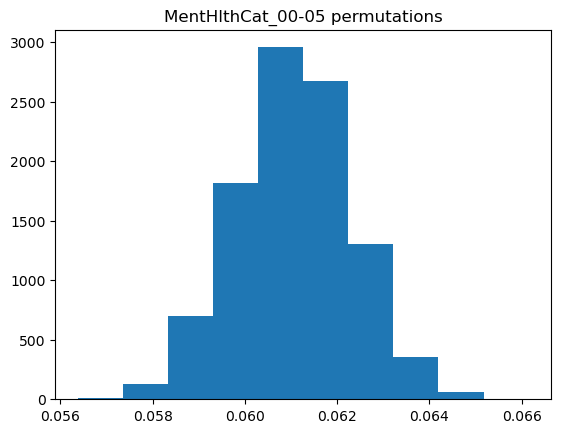

MentHlthCat_00-05, permutation test: p value = 0.5071 KEEP Attribute - different


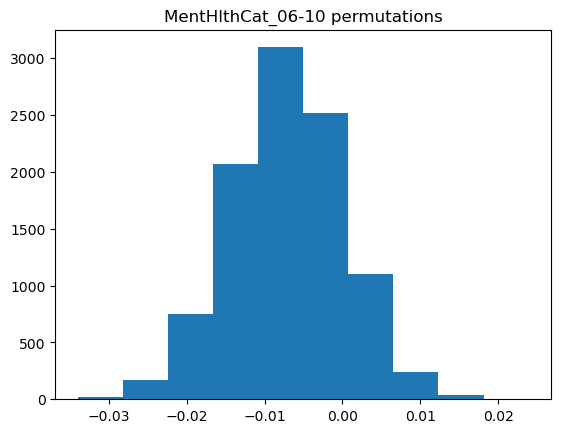

MentHlthCat_06-10, permutation test: p value = 0.4964 KEEP Attribute - different


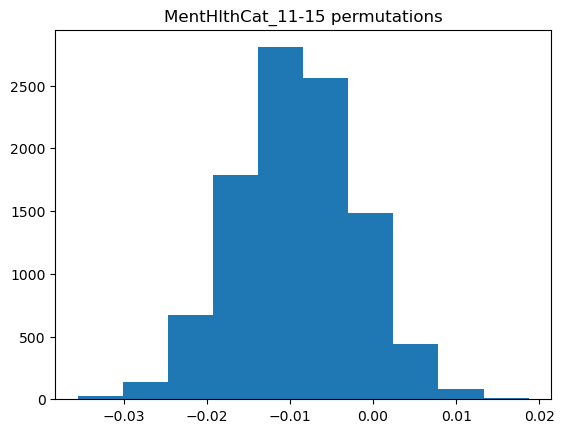

MentHlthCat_11-15, permutation test: p value = 0.4982 KEEP Attribute - different


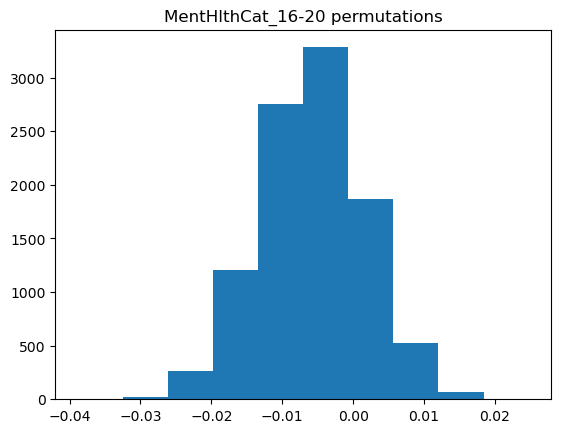

MentHlthCat_16-20, permutation test: p value = 0.5026 KEEP Attribute - different


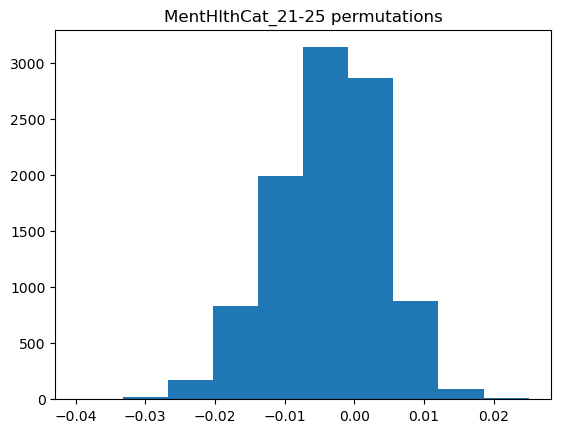

MentHlthCat_21-25, permutation test: p value = 0.5422 KEEP Attribute - different


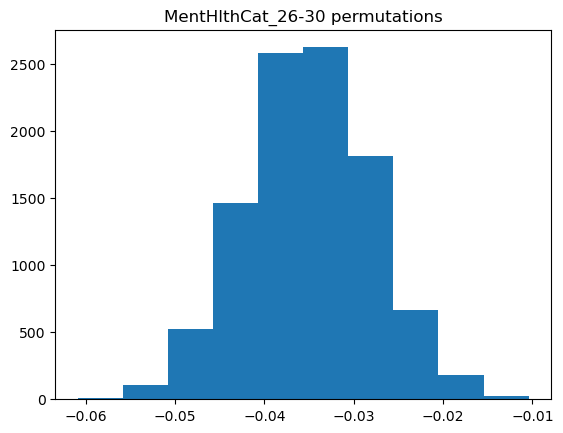

MentHlthCat_26-30, permutation test: p value = 0.5003 KEEP Attribute - different


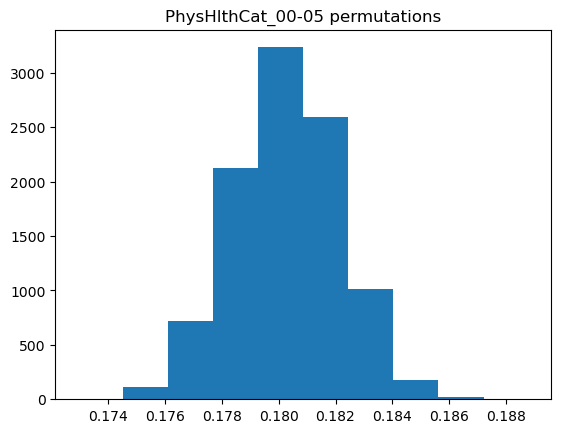

PhysHlthCat_00-05, permutation test: p value = 0.5050 KEEP Attribute - different


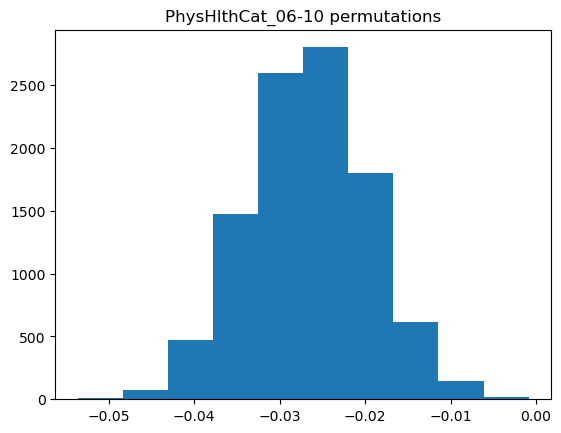

PhysHlthCat_06-10, permutation test: p value = 0.4953 KEEP Attribute - different


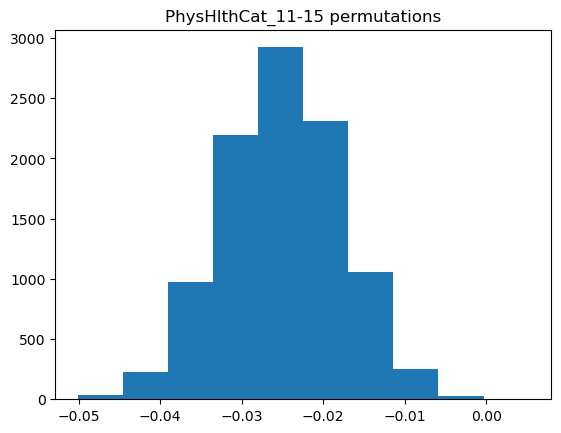

PhysHlthCat_11-15, permutation test: p value = 0.4982 KEEP Attribute - different


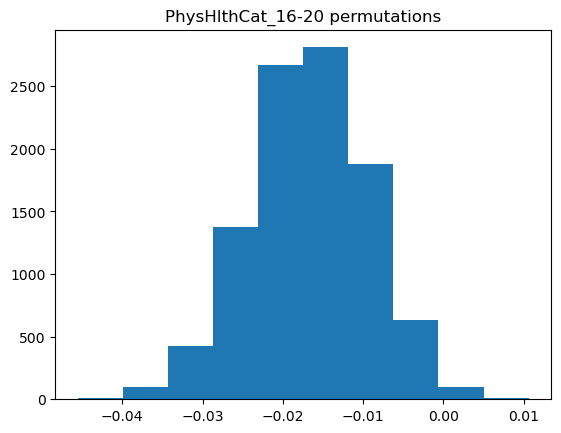

PhysHlthCat_16-20, permutation test: p value = 0.5102 KEEP Attribute - different


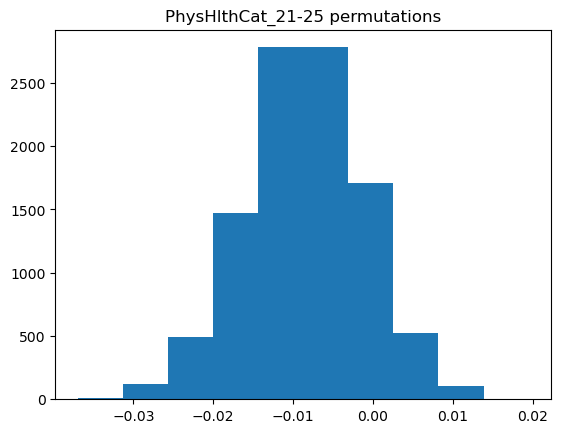

PhysHlthCat_21-25, permutation test: p value = 0.5080 KEEP Attribute - different


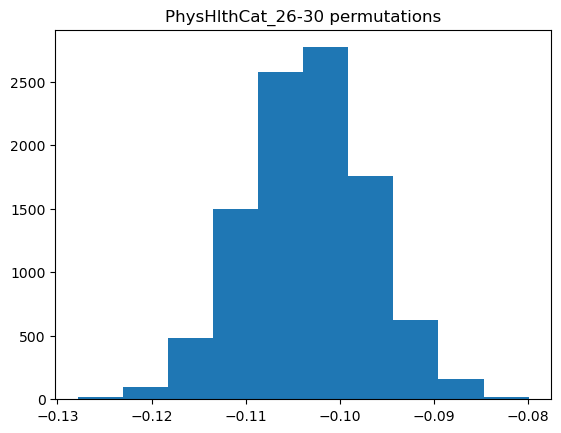

PhysHlthCat_26-30, permutation test: p value = 0.5014 KEEP Attribute - different


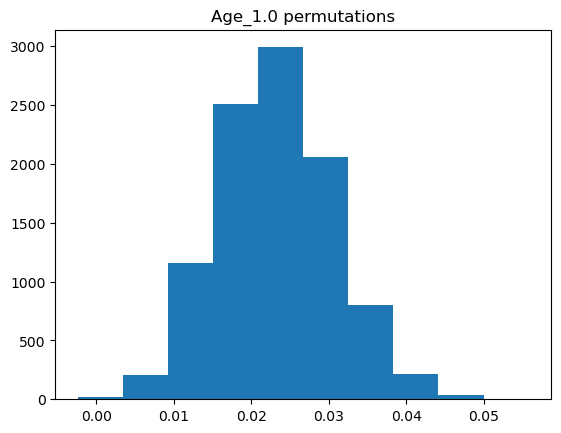

Age_1.0, permutation test: p value = 0.4798 KEEP Attribute - different


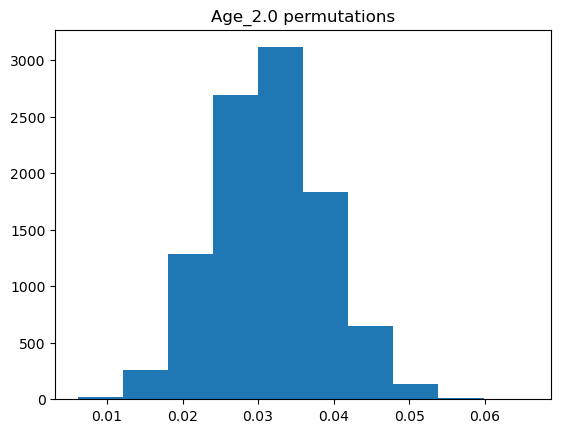

Age_2.0, permutation test: p value = 0.4860 KEEP Attribute - different


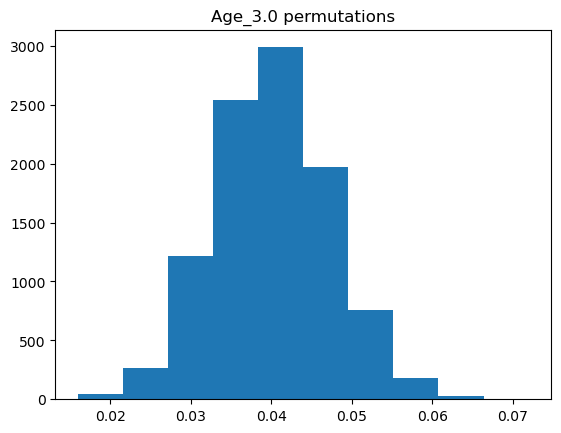

Age_3.0, permutation test: p value = 0.4953 KEEP Attribute - different


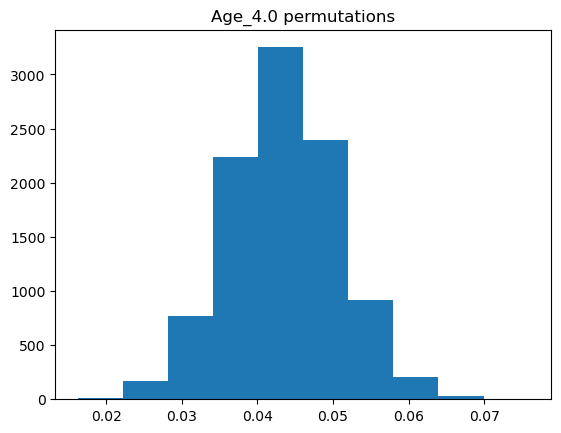

Age_4.0, permutation test: p value = 0.4902 KEEP Attribute - different


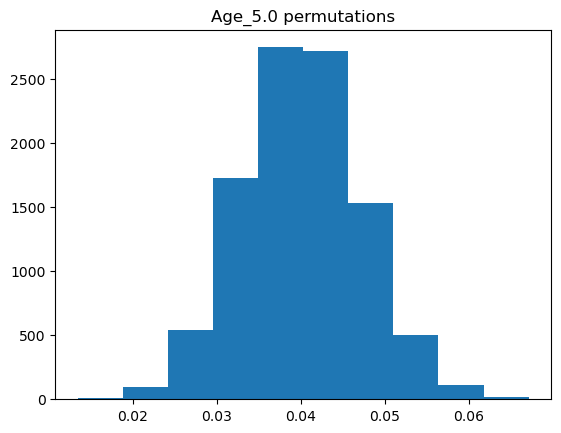

Age_5.0, permutation test: p value = 0.4963 KEEP Attribute - different


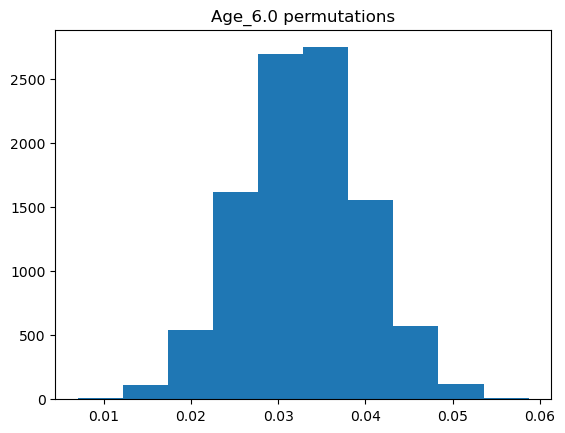

Age_6.0, permutation test: p value = 0.4978 KEEP Attribute - different


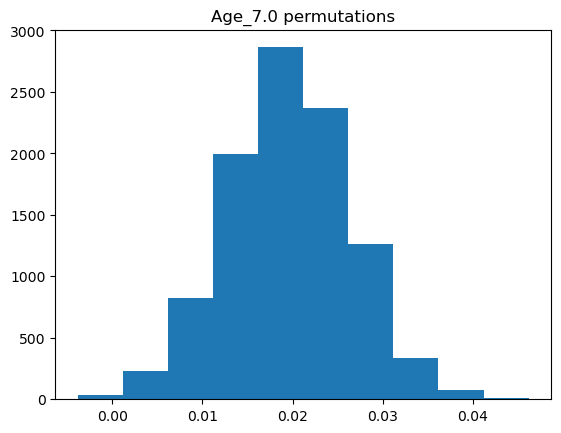

Age_7.0, permutation test: p value = 0.4946 KEEP Attribute - different


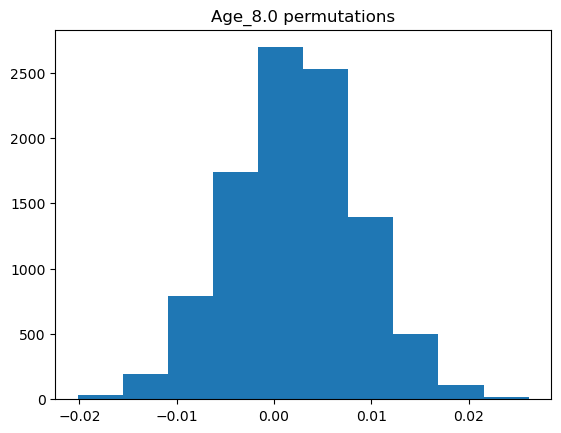

Age_8.0, permutation test: p value = 0.5061 KEEP Attribute - different


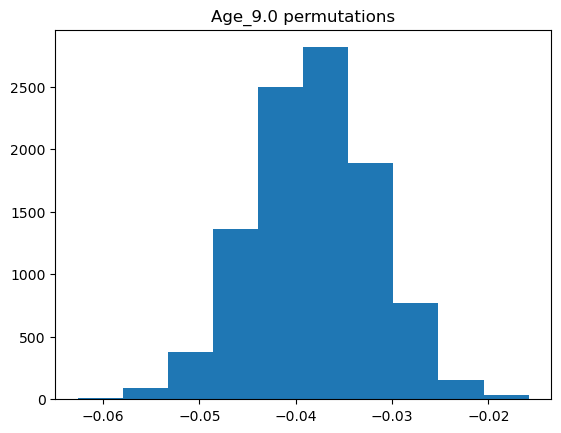

Age_9.0, permutation test: p value = 0.5071 KEEP Attribute - different


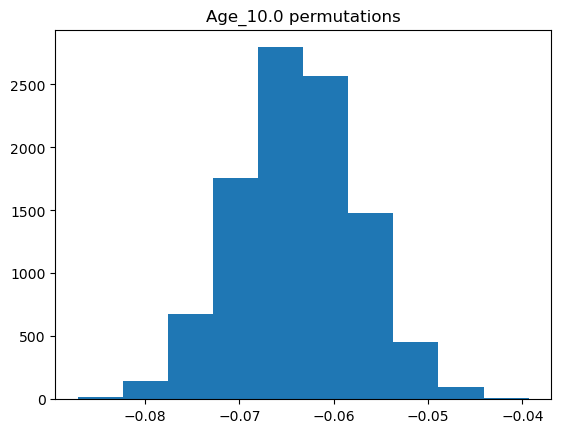

Age_10.0, permutation test: p value = 0.5064 KEEP Attribute - different


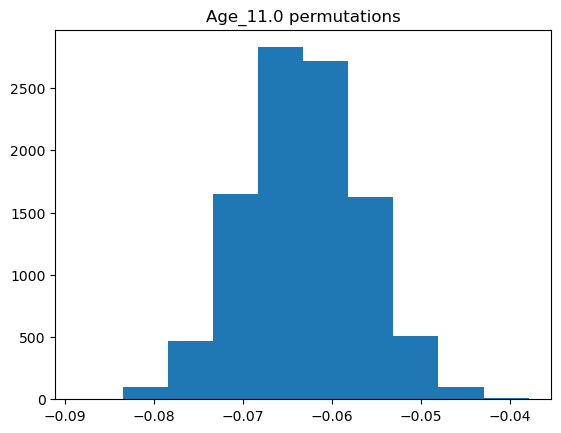

Age_11.0, permutation test: p value = 0.4989 KEEP Attribute - different


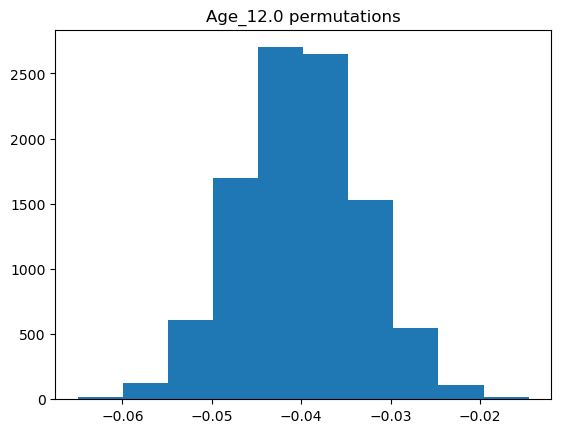

Age_12.0, permutation test: p value = 0.4946 KEEP Attribute - different


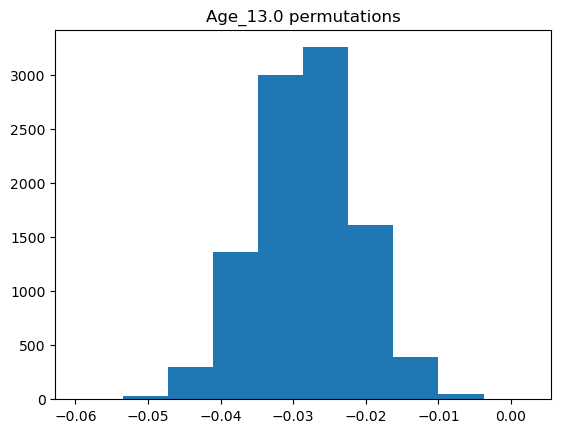

Age_13.0, permutation test: p value = 0.4980 KEEP Attribute - different


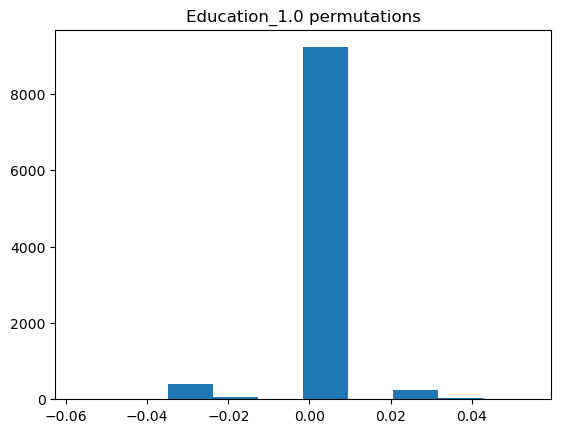

Education_1.0, permutation test: p value = 0.9508 KEEP Attribute - different


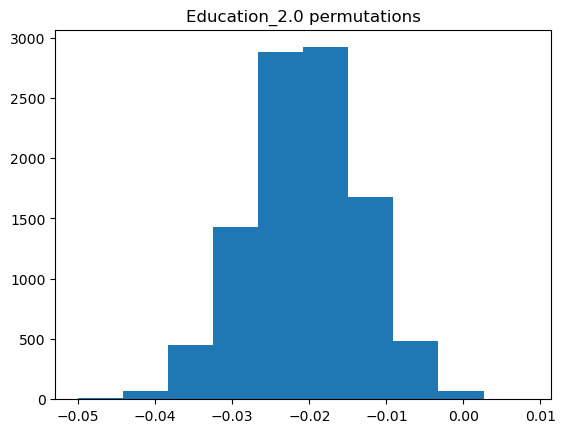

Education_2.0, permutation test: p value = 0.4912 KEEP Attribute - different


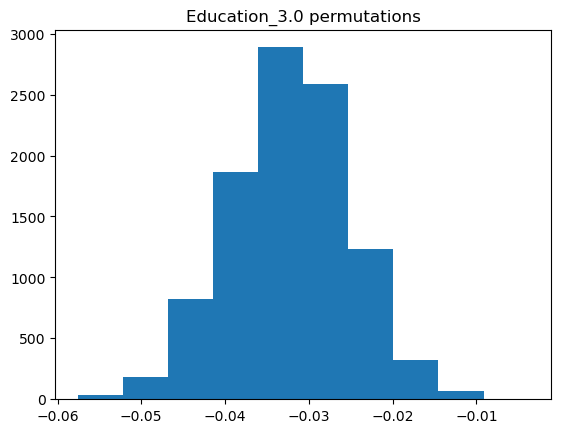

Education_3.0, permutation test: p value = 0.5158 KEEP Attribute - different


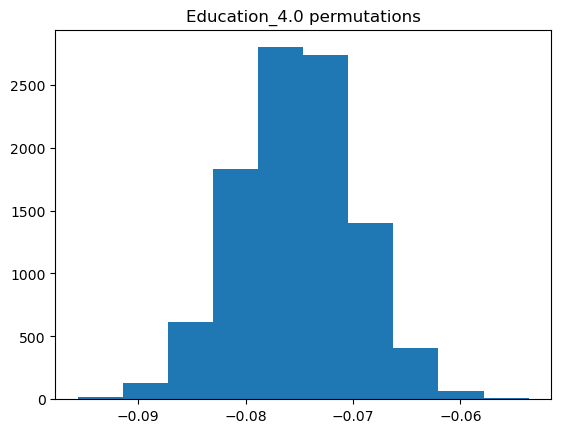

Education_4.0, permutation test: p value = 0.5017 KEEP Attribute - different


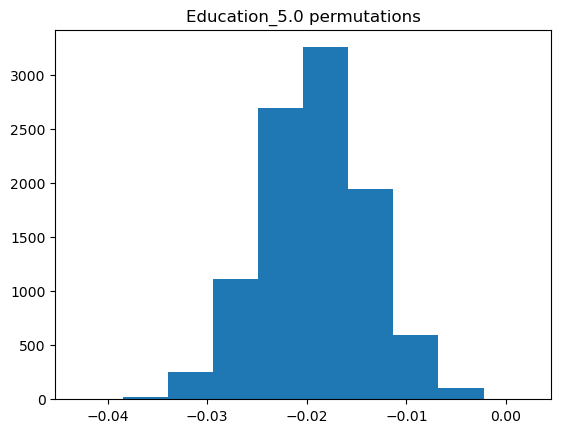

Education_5.0, permutation test: p value = 0.5058 KEEP Attribute - different


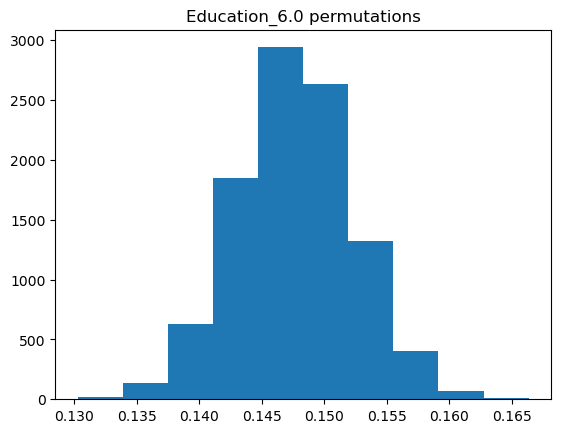

Education_6.0, permutation test: p value = 0.5017 KEEP Attribute - different


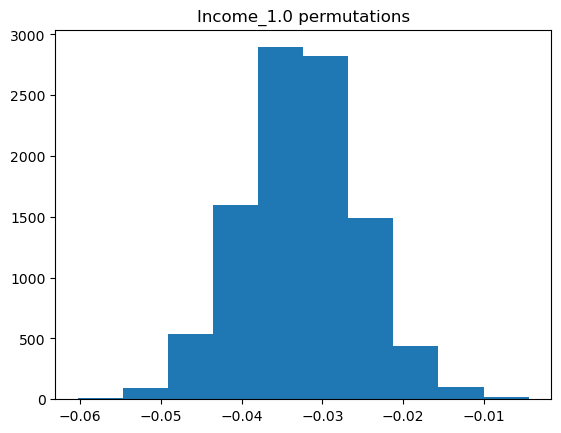

Income_1.0, permutation test: p value = 0.5050 KEEP Attribute - different


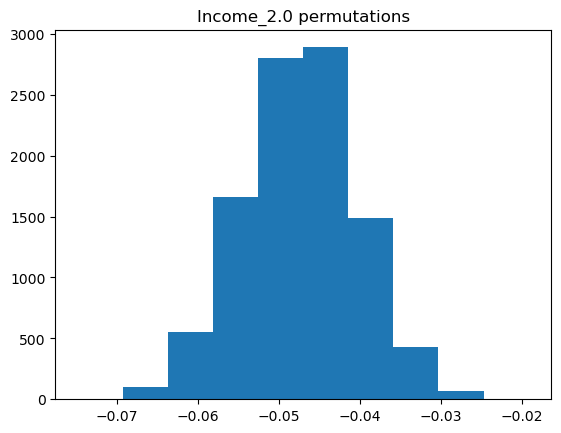

Income_2.0, permutation test: p value = 0.5080 KEEP Attribute - different


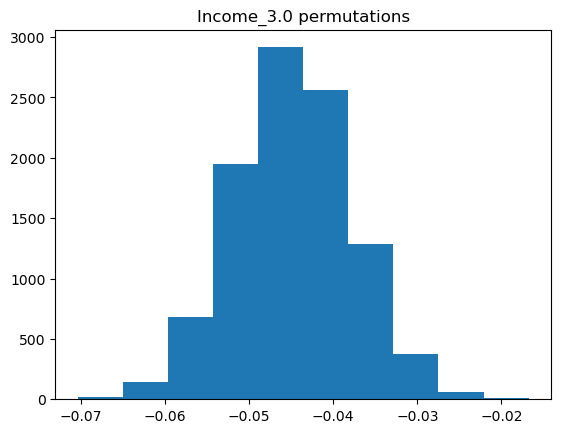

Income_3.0, permutation test: p value = 0.4932 KEEP Attribute - different


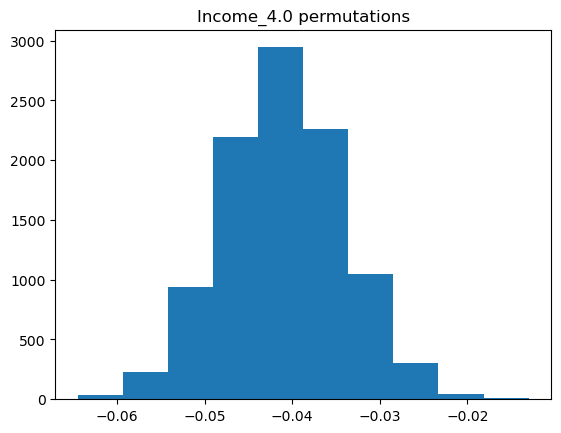

Income_4.0, permutation test: p value = 0.5022 KEEP Attribute - different


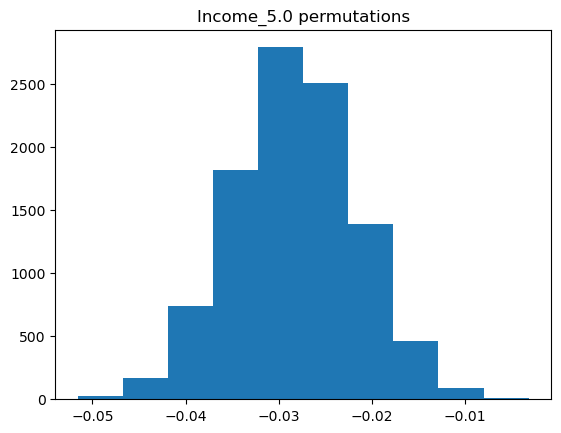

Income_5.0, permutation test: p value = 0.4969 KEEP Attribute - different


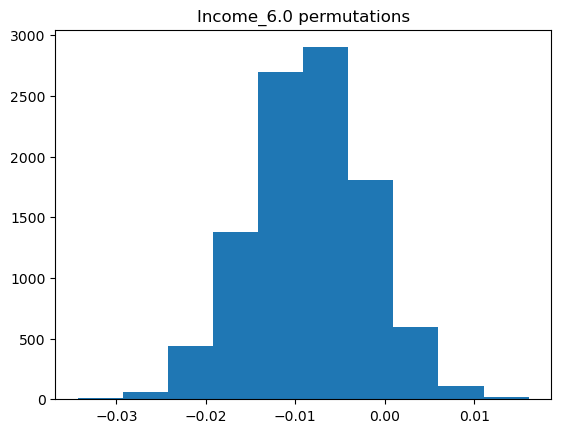

Income_6.0, permutation test: p value = 0.4945 KEEP Attribute - different


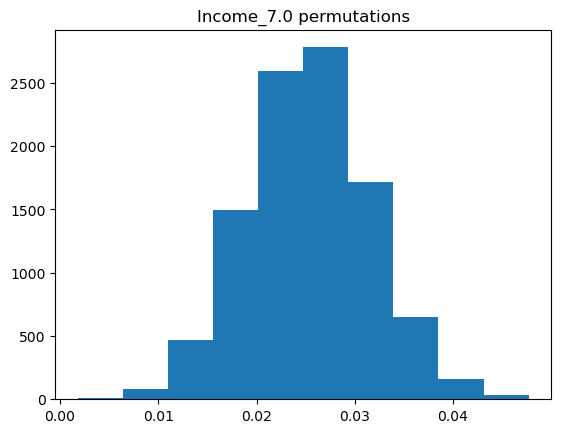

Income_7.0, permutation test: p value = 0.4945 KEEP Attribute - different


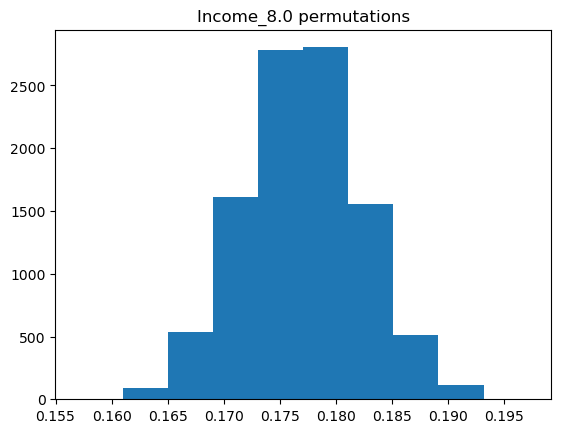

Income_8.0, permutation test: p value = 0.5047 KEEP Attribute - different


In [64]:
for i in df_new.columns:
    if i != 'Diabetes_binary' and i != 'BMI':
        obs_difference=df_new[(df_new['Diabetes_binary'] == 0) & (df_new[i] == 1)][i].count()/df_new[df_new['Diabetes_binary'] == 0]['Diabetes_binary'].count() - df_new[(df_new['Diabetes_binary'] == 1) & (df_new[i] == 1)][i].count()/df_new[df_new['Diabetes_binary'] == 1]['Diabetes_binary'].count()
        difference = list()
        for j in range(10000):
            permutation = np.random.permutation(df_new[i])
            difference.append(
                sum(permutation[(df_new['Diabetes_binary'] == 0) & (df_new[i] == 1)])/
                sum(permutation[df_new['Diabetes_binary'] == 0]) - 
                sum(permutation[(df_new['Diabetes_binary'] == 1) & (df_new[i] == 1)])/
                sum(permutation[df_new['Diabetes_binary'] == 1]))

        # Make a variable called 'histo', and assign to it the result of plotting a histogram of the difference list. 
        histo = plt.hist(difference)
        plt.title(i + " permutations")
        plt.show()
        
        p_value =  sum(1 for i in difference if i > obs_difference) / 10000
        if p_value <= .05:
            decision = 'REJECT Attribute - same' # Does not look like it has predictive value 
            color = Fore.RED
        else:
            decision = "KEEP Attribute - different" # May have predictive value
            color = Style.RESET_ALL
        print(color + '{}, permutation test: p value = {:.4f} {}'.format(i, p_value, decision) + Style.RESET_ALL)

## SUMMARY

The following tasks were performed:

We revisited the hypothesis we want to find the answers to. Data Wrangling was performed.  We start our EDA analysis by assessing the quality of the data. We do this to understand what information is in the data and make sure what the data stands for and what is missing.

We concluded from the data wrangling that we have no missing data and have a tidy data.

We assess the datasets statistical summary and followed by creating a visualization of our attributes or features on histogram. We can see that the majority of the data are binary and are categorical data.

We generated a Pandas profiling report which shows us not much since our data are mostly categorical and would need a different method to represent the data relationships.

Other visualization like the boxplot and heatmap were created and only more questions come up to see if the variables would show some more interaction. This leads to the need for further exploration.

Since the question to answer is finding the best predictors for diabetes, we checked the Diabetes_binary which would be the possible response variable to use in predicting the risk factors. This variable is explored from histogram to summary statistics and counts.

Correlation of binary and categorical data are not valid and performing a correlation method would not provide us with any value or clues.

Next step is to use statistical methods to show statistical relationship strengths.

Decided to create histograms for the data segregated by the Diabetes_binary. It showed the interaction of diabetics and non-diabetics with the different attributes in the dataset.   We simplified the categories within the single data field to <10 categories as shown in the histogram charts.

The BMI data undergone min/max scaling to make it consistent with the other categorical data and performed one hot encoding for categorical data.

Hypothesis testing was performed to decide if there is a difference between diabetics and non-diabetics. We used the two-sided test, z-test and p-value calculation and found that most of the attributes are significantly different between the diabetics and non-diabetics which would need more investigation.

We also performed z-test and p-value calculation for the BMI attribute (quantitative variable) and results showed that the non-diabetics have lower BMI values than the diabetics.

We also performed Permutation test on each of the attributes and the results support our z-test results.

We have tidied the data and explored the relationship between our dependent/response variable and  independent/explanatory variables. It seems that almost all the features would still likely have some impact in the modeling based on the relationships between the features and the response variable.
